## Exploratory data analysis of Industrials GIC sector companies' ESG ratings

In [2]:
# This is an example of an exploratory data analysis of ESG ratings, for beginners

# We will look at the "Industrials" sector (categorized per the Global Industry Classification Standard, see https://www.msci.com/our-solutions/indexes/gics)
# We will then focus on the "Trucking" Subindustry

In [3]:
# Helpful resources
# https://python.plainenglish.io/data-storytelling-5-simple-tips-with-python-plotly-to-spice-up-your-data-00865549f2b7
# Thanks to Andrea D'Agostino for his helpful article: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee  

In [4]:
# Libraries for Exploratory Data Analysis (EDA)

# data manipulation
import pandas as pd
import numpy as np

# data viz
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

import json
from pandas import json_normalize
from pprint import pprint

In [5]:
# Check the working directory 
import os
os.getcwd()

'C:\\Users\\jenki\\OneDrive\\Desktop\\CTLA-projects\\PORTFOLIO\\EDA-ESG-ratings-Industrials'

#### This dataset was extracted from the ESGAnalytics.io API. This data was pulled using a subscription although you can pull a limited amount of data without one.
ESG Analytics.io "[quantifies] ESG information from unstructured text to deliver a third-party perspective on company ESG performance"
ESG Analytics.io uses a "proprietary ESG AI engine that leverages Natural Language Processing (NLP) to determine which companies are involved in
a given text and extracts 'ESG-relevant' signals. 
Sentiment analysis models then score the signals on a scale of -1 (negative) to +1 (positive) for the "company_pulse" score
The higher the company_pulse score, the better the company is doing regarding ESG issues.

In [6]:
# Step 1: Import dataset using read_csv and save to dataframe
# may need to add  "encoding="ISO-8859-1"
#df = pd.read_csv("MATERIALS-DATASET.csv", encoding="ISO-8859-1")
df = pd.read_csv("INDUSTRIALS-DATASET-041024.csv")
df.head()

Unique_id Symbol             Company_name                 Exchange  \
0     190179    MMM               3M Company  New York Stock Exchange   
1     205868   JOBS               51job, Inc                   Nasdaq   
2     191323    AOS  A. O. Smith Corporation  New York Stock Exchange   
3     206373   AAON                AAON, Inc                   Nasdaq   
4     190905    AIR                 AAR Corp  New York Stock Exchange   

     gicSector                        gicSubindustry  Company_ESG_pulse  \
0  Industrials              Industrial Conglomerates          -0.083992   
1  Industrials  Human Resource & Employment Services           0.776978   
2  Industrials                     Building Products           0.251170   
3  Industrials                     Building Products           0.739143   
4  Industrials                   Aerospace & Defense           0.588800   

   ESG_beta   SNP  Sustainalytics  ... 52w_change price  \
0  0.010832  67.0            32.2  ...          -11.290   
1 -0.203820  89.0            15.2  ...              NaN   
2  0.159637  17.0            25.5  ...           19.470   
3       NaN   NaN             NaN  ...          -10.145   
4       NaN   NaN             NaN  ...            6.670   

   52w_change price percent  52w_average volume  \
0                    -10.83           1648276.0   
1                       NaN                 NaN   
2                     29.49            452457.0   
3                    -10.51            157665.0   
4                     12.26             74456.0   

                                  Name       Sector  \
0              3M Company Common Stock  Health Care   
1                                  NaN          NaN   
2  A.O. Smith Corporation Common Stock  Industrials   
3                                  NaN          NaN   
4               AAR Corp. Common Stock  Industrials   

                          Industry          isin      cusip  Securities_type  \
0       Medical/Dental Instruments  US88579Y1010  88579Y101     Common Stock   
1                              NaN  US3168271043  316827104     Common Stock   
2  Industrial Machinery/Components  US8318652091  831865209     Common Stock   
3                              NaN  US0003602069  000360206     Common Stock   
4                        Aerospace  US0003611052  000361105     Common Stock   

   Currency_code  
0            USD  
1            USD  
2            USD  
3            USD  
4            USD  

[5 rows x 31 columns]

### Understand the big picture of the data

In [7]:
# Use .shape to see the # of rows (the first # below) and the # of columns (the second # below) of the dataset, this dataset has 706 rows and 31 columns

df.shape

(706, 31)

In [8]:
# print info about the dataframe such as column labels/ names ("Column"), number of values in each column that are not null ("Non-Null Count"),
# and datatype of each column ("Dtype")
# Also shows memory usage 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unique_id                  706 non-null    int64  
 1   Symbol                     705 non-null    object 
 2   Company_name               706 non-null    object 
 3   Exchange                   706 non-null    object 
 4   gicSector                  706 non-null    object 
 5   gicSubindustry             691 non-null    object 
 6   Company_ESG_pulse          706 non-null    float64
 7   ESG_beta                   146 non-null    float64
 8   SNP                        145 non-null    float64
 9   Sustainalytics             150 non-null    float64
 10  MSCI                       130 non-null    object 
 11  SNP_normalized             145 non-null    float64
 12  Sustainalytics_normalized  150 non-null    float64
 13  MSCI_normalized            130 non-null    float64

In [9]:
# The above shows that "unique_id" is an "int64" datatype and wee want to change it to text ("str" or "object") because we don't want the ids to show up in any calculations later on
convert = {"Unique_id": str
          }
df = df.astype(convert)

# use df.info() to make sure that the datatype conversion worked and is now "object" instead of int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unique_id                  706 non-null    object 
 1   Symbol                     705 non-null    object 
 2   Company_name               706 non-null    object 
 3   Exchange                   706 non-null    object 
 4   gicSector                  706 non-null    object 
 5   gicSubindustry             691 non-null    object 
 6   Company_ESG_pulse          706 non-null    float64
 7   ESG_beta                   146 non-null    float64
 8   SNP                        145 non-null    float64
 9   Sustainalytics             150 non-null    float64
 10  MSCI                       130 non-null    object 
 11  SNP_normalized             145 non-null    float64
 12  Sustainalytics_normalized  150 non-null    float64
 13  MSCI_normalized            130 non-null    float64

In [10]:
# Use the .describe function to see descriptive information about the dataset including statistics for numerical variables/ fields
df.describe()

# count is how many values/ rows are in the company_pulse column/ field
# mean is the average of those values
# std is the standard deviation of the values; small number for standard deviation indicates data is clustered more around the mean whil high number means the data are more spread out from the mean
# min is the minimum/ lowest value for the field/ column
# 25% is the 25th percentile which is the value at which 25% of the scores are below - in other words, 25% of the company pulse scores are below 0
# 50% is the 50th percentile which is the value at which 50% of the scores are below - so 50% of the company pulse scores are below 0.241702
# 75% is the 75th percentile which is the value at which 75% of the scores are below - so 75% of the company pulse scores are below 0.403044
# max is the highest number for that column - so the highest company_pulse score is 0.956500

Company_ESG_pulse    ESG_beta         SNP  Sustainalytics  \
count         706.000000  146.000000  145.000000      150.000000   
mean            0.209729    0.044289   42.241379       26.162000   
std             0.389824    0.206375   23.009139       13.806941   
min            -0.971600   -0.677530    5.000000        9.700000   
25%             0.000000   -0.065575   24.000000       19.700000   
50%             0.224812    0.038270   35.000000       24.900000   
75%             0.503942    0.173328   62.000000       30.450000   
max             0.995400    0.525635   90.000000      166.600000   

       SNP_normalized  Sustainalytics_normalized  MSCI_normalized  \
count      145.000000                 150.000000       130.000000   
mean        42.241379                  65.405000        68.104615   
std         23.009139                  34.517354        18.778490   
min          5.000000                  24.250000        14.280000   
25%         24.000000                  49.250000        57.120000   
50%         35.000000                  62.250000        71.400000   
75%         62.000000                  76.125000        85.680000   
max         90.000000                 416.500000        99.960000   

             Volume    Market Cap  52w_highest price  52w_lowest price  \
count  2.410000e+02  2.410000e+02         389.000000        389.000000   
mean   8.456987e+05  1.730012e+10          85.541542         50.376195   
std    2.330181e+06  3.211178e+10         128.038653         78.959463   
min    2.160000e+02  9.708627e+07           0.000000          0.000000   
25%    1.013600e+05  1.320469e+09          10.580000          4.460000   
50%    2.502110e+05  5.135684e+09          42.000000         20.850000   
75%    6.342210e+05  1.634392e+10         113.200000         65.280000   
max    2.738694e+07  2.159040e+11        1246.220000        731.430000   

       52w_change price  52w_change price percent  52w_average volume  
count        389.000000                389.000000        3.890000e+02  
mean          17.664036                 29.454987        4.647115e+05  
std           46.038715                 86.964038        1.090933e+06  
min          -80.140000               -100.000000        0.000000e+00  
25%           -0.260000                 -6.410000        3.200600e+04  
50%            2.870000                 18.330000        1.346910e+05  
75%           22.855000                 52.440000        4.243290e+05  
max          469.770000                900.000000        1.039691e+07

In [11]:
# Make sure that the data is properly prepped/ cleaned and ready for analysis
# First, check to see if there are any duplicate rows
# If the output of .duplicated().sum() is 0, that's good news because it means that we don't have any duplicates
df.duplicated().sum()

0

In [12]:
# Check whether we need to rename any of the columns to make them more understandable or to fix typos
df.columns

Index(['Unique_id', 'Symbol', 'Company_name', 'Exchange', 'gicSector',
       'gicSubindustry', 'Company_ESG_pulse', 'ESG_beta', 'SNP',
       'Sustainalytics', 'MSCI', 'SNP_normalized', 'Sustainalytics_normalized',
       'MSCI_normalized', 'Update_date-ESG_scores', 'Address', 'Country',
       'Volume', 'Market Cap', '52w_highest price', '52w_lowest price',
       '52w_change price', '52w_change price percent', '52w_average volume',
       'Name', 'Sector', 'Industry', 'isin', 'cusip', 'Securities_type',
       'Currency_code'],
      dtype='object')

In [13]:
# We'll change the names of 2 columns and save to a new dataframe
# Using inplace = True means that the original dataframe will be modified permanently; 
# be careful when using inplace=True; for more info., see  https://towardsdatascience.com/a-simple-guide-to-inplace-operations-in-pandas-7a1d97ecce24
df1 = df.rename(columns = {"gicSector": "GIC_sector",
                    "gicSubindustry": "GIC_subindustry"
                          })
                  
df1.head()

Unique_id Symbol             Company_name                 Exchange  \
0    190179    MMM               3M Company  New York Stock Exchange   
1    205868   JOBS               51job, Inc                   Nasdaq   
2    191323    AOS  A. O. Smith Corporation  New York Stock Exchange   
3    206373   AAON                AAON, Inc                   Nasdaq   
4    190905    AIR                 AAR Corp  New York Stock Exchange   

    GIC_sector                       GIC_subindustry  Company_ESG_pulse  \
0  Industrials              Industrial Conglomerates          -0.083992   
1  Industrials  Human Resource & Employment Services           0.776978   
2  Industrials                     Building Products           0.251170   
3  Industrials                     Building Products           0.739143   
4  Industrials                   Aerospace & Defense           0.588800   

   ESG_beta   SNP  Sustainalytics  ... 52w_change price  \
0  0.010832  67.0            32.2  ...          -11.290   
1 -0.203820  89.0            15.2  ...              NaN   
2  0.159637  17.0            25.5  ...           19.470   
3       NaN   NaN             NaN  ...          -10.145   
4       NaN   NaN             NaN  ...            6.670   

   52w_change price percent  52w_average volume  \
0                    -10.83           1648276.0   
1                       NaN                 NaN   
2                     29.49            452457.0   
3                    -10.51            157665.0   
4                     12.26             74456.0   

                                  Name       Sector  \
0              3M Company Common Stock  Health Care   
1                                  NaN          NaN   
2  A.O. Smith Corporation Common Stock  Industrials   
3                                  NaN          NaN   
4               AAR Corp. Common Stock  Industrials   

                          Industry          isin      cusip  Securities_type  \
0       Medical/Dental Instruments  US88579Y1010  88579Y101     Common Stock   
1                              NaN  US3168271043  316827104     Common Stock   
2  Industrial Machinery/Components  US8318652091  831865209     Common Stock   
3                              NaN  US0003602069  000360206     Common Stock   
4                        Aerospace  US0003611052  000361105     Common Stock   

   Currency_code  
0            USD  
1            USD  
2            USD  
3            USD  
4            USD  

[5 rows x 31 columns]

In [14]:
# If you want to save the file at this point, export file as a CSV, without the Pandas index, but with the header
# df.to_csv("industrials_temp.csv", index = False, header=True)

### Univariate analysis/ understand the variables

In [15]:
# Use .value_counts() to see how many companies are in each GIC Subindustry in this dataset;
# For example, you can see below that 96 companies are in the "Industrial machinery" subindustry 
# while only one company is in "Electronic Components."
df1.GIC_subindustry.value_counts()

GIC_subindustry
Industrial Machinery                     96
Trading Companies & Distributors         58
Electrical Components & Equipment        53
Aerospace & Defense                      51
Construction & Engineering               44
Building Products                        36
Construction Machinery & Heavy Trucks    35
Research & Consulting Services           33
Marine                                   32
Airlines                                 31
Environmental & Facilities Services      27
Trucking                                 27
Human Resource & Employment Services     22
Industrial Conglomerates                 21
Diversified Support Services             17
Air Freight & Logistics                  17
Office Services & Supplies               16
Heavy Electrical Equipment               15
Railroads                                11
Airport Services                         10
Agricultural & Farm Machinery             8
Commercial Printing                       7
Highways & Railt

In [16]:
# use normalize=True to see percentages
df1.GIC_subindustry.value_counts(normalize=True)

GIC_subindustry
Industrial Machinery                     0.138929
Trading Companies & Distributors         0.083936
Electrical Components & Equipment        0.076700
Aerospace & Defense                      0.073806
Construction & Engineering               0.063676
Building Products                        0.052098
Construction Machinery & Heavy Trucks    0.050651
Research & Consulting Services           0.047757
Marine                                   0.046310
Airlines                                 0.044863
Environmental & Facilities Services      0.039074
Trucking                                 0.039074
Human Resource & Employment Services     0.031838
Industrial Conglomerates                 0.030391
Diversified Support Services             0.024602
Air Freight & Logistics                  0.024602
Office Services & Supplies               0.023155
Heavy Electrical Equipment               0.021708
Railroads                                0.015919
Airport Services                  

In [17]:
#  Evaluate distribution kurtosis and asymmetry/ skewness
# Skewed data can affect a machine learning model's predicting capabilities (see https://ashington.medium.com/interpretation-of-measures-of-shape-skewness-kurtosis-b8b87c72c65)

# Kurtosis is a statistical measure that indicates how much data is in the "tails" (furthest from the mean) of normally distributed data 
# In a nutshell, kurtosis is how tall or short the curve is on a graph

# "Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve..."
# "Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution." 
# Skewness is used along with kurtosis to better judge the likelihood of data falling in the tails of a probability distribution
# - Investopedia

# Kurtosis values can range from 1 to infinity, but generally a kurtosis value=3 indicates a normal distribution (see https://www.analyticsvidhya.com/blog/2022/09/importance-of-skewness-kurtosis-co-efficient-of-variation/#:~:text=Range%20of%20Kurtosis,indicates%20negative%20kurtosis%20(Platicurtic).)
print(f"Skewness: {df1['Company_ESG_pulse'].skew()}")
print(f"kurtosis: {df1['Company_ESG_pulse'].kurt()}")

Skewness: -0.39452482323989185
kurtosis: -0.10121192781771704


## Visualize the data

In [18]:
# see https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl

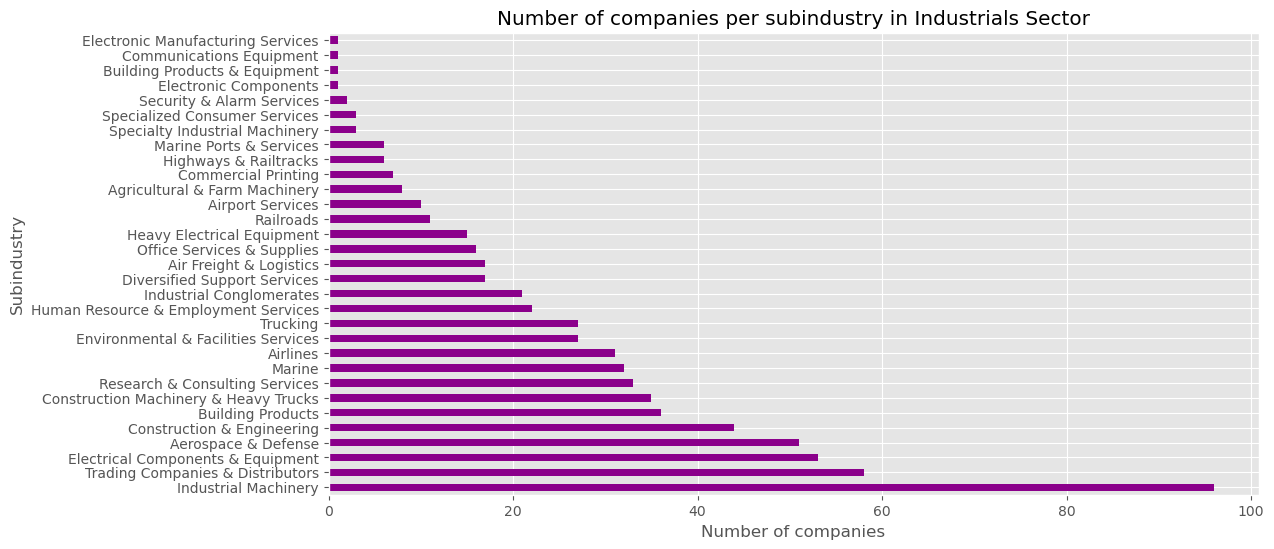

In [19]:
# Simple bar chart using MATPLOTLIB
# This first version of our bar chart is kind of hard to read, we'll improve it in later code

# See https://matplotlib.org/stable/gallery/color/named_colors.html for color options
# kind=barh means horizontal bar chart, remove the "h" and use just "bar" if you want it to be vertical bars
df1.GIC_subindustry.value_counts().plot(kind="barh", color ='darkmagenta')

plt.title("Number of companies per subindustry in Industrials Sector")
plt.xlabel("Number of companies")
plt.ylabel("Subindustry")
plt.show()

In [20]:
# rcParams is a dictionary of styling for matplotlib; if you use it at the beginning of your notebook, it will then apply to all of the plots.
# see output below for types of values available (https://drmattcrooks.medium.com/how-to-set-up-rcparams-in-matplotlib-355a0b9494ec#:~:text=What%20is%20rcParams%20in%20matplotlib,apply%20to%20all%20your%20plots.&text=Printing%20out%20rcParams%20in%20a,the%20key%2Dvalue%20pair%20structure.)
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
    

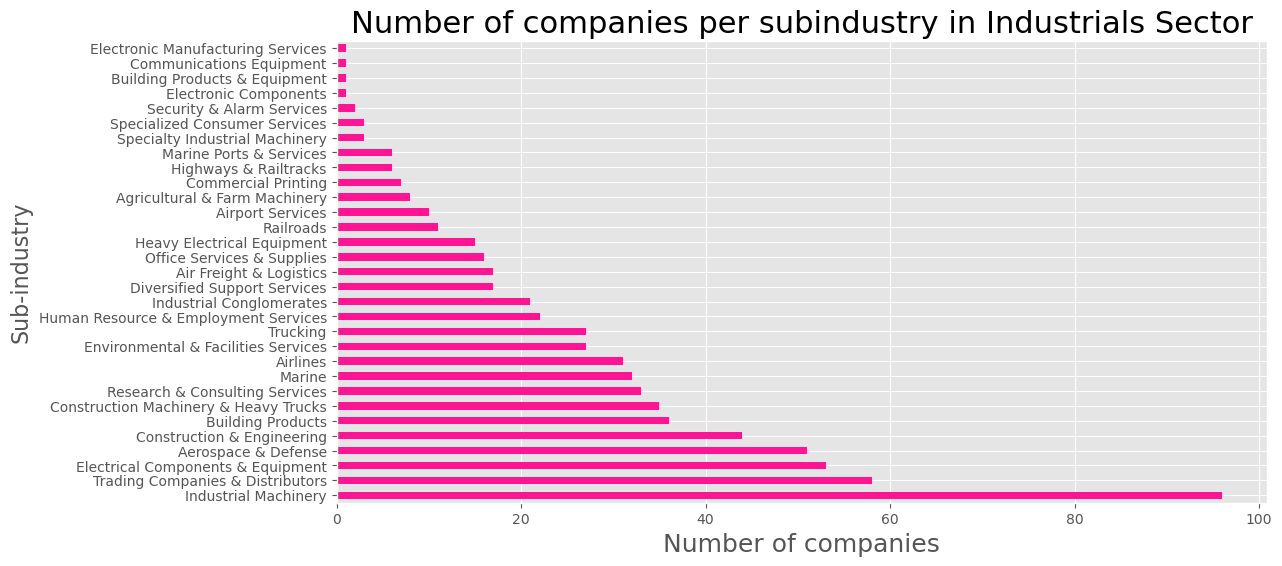

In [21]:
# Start adding styling to the bar chart
# MATPLOTLIB
df1.GIC_subindustry.value_counts().plot(kind="barh", color ='deeppink')

# Set the default figure size
plt.rcParams['figure.figsize'] = [10,7]

plt.title("Number of companies per subindustry in Industrials Sector", fontsize=22)
plt.xlabel("Number of companies", fontsize=18)
plt.ylabel("Sub-industry", fontsize=16)
plt.show()

In [22]:
# See other fonts available for your plot
# https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code =  "/n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("div style='column-count: 2;'>{}</div".format(code))

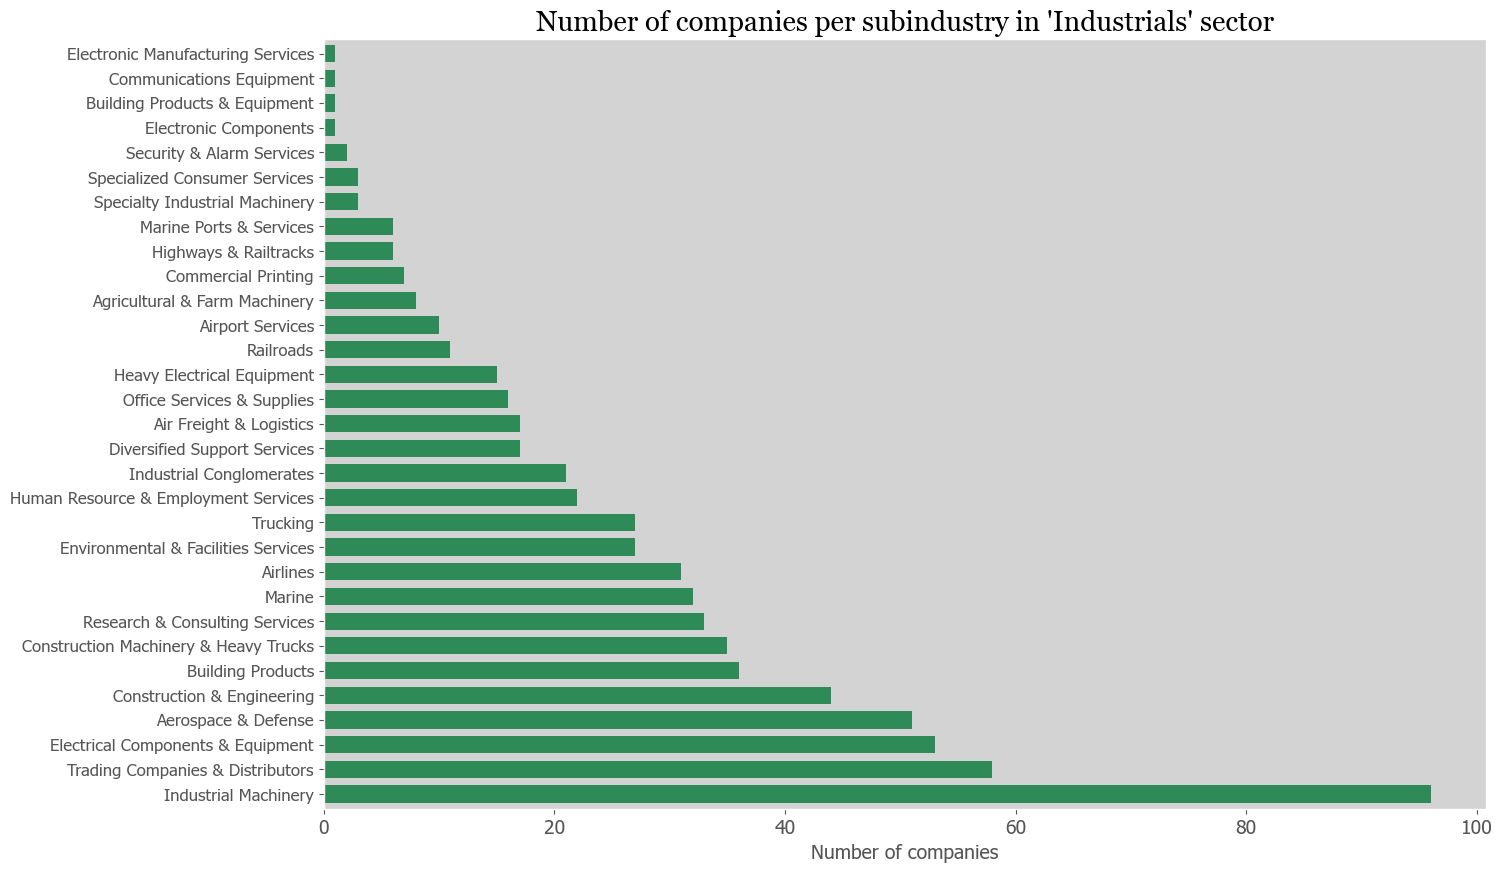

In [23]:
# Remove gridlines, change fonts
# MATPLOTLIB
csfont = {'fontname': 'Georgia'}
hfont = {'fontname': 'Tahoma'}

fig, ax = plt.subplots(figsize=(15,10))

ax = df1.GIC_subindustry.value_counts().plot(kind="barh", color ='seagreen', width=0.7)

ax.set_facecolor("lightgray")
plt.title("Number of companies per subindustry in 'Industrials' sector", fontsize=20,**csfont)
plt.xlabel("Number of companies", fontsize=14,**hfont)
plt.xticks(fontsize=14, **hfont)
plt.ylabel("", fontsize=12)
plt.yticks(fontsize=12, **hfont)
ax.grid(False)

# Use plt.savefig to save the chart as a png file
# Note that plt.show() should be placed AFTER plt.savefig() otherwise plt.savefig() will just save a blank figure)

#plt.savefig('industrials-heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Histogram example

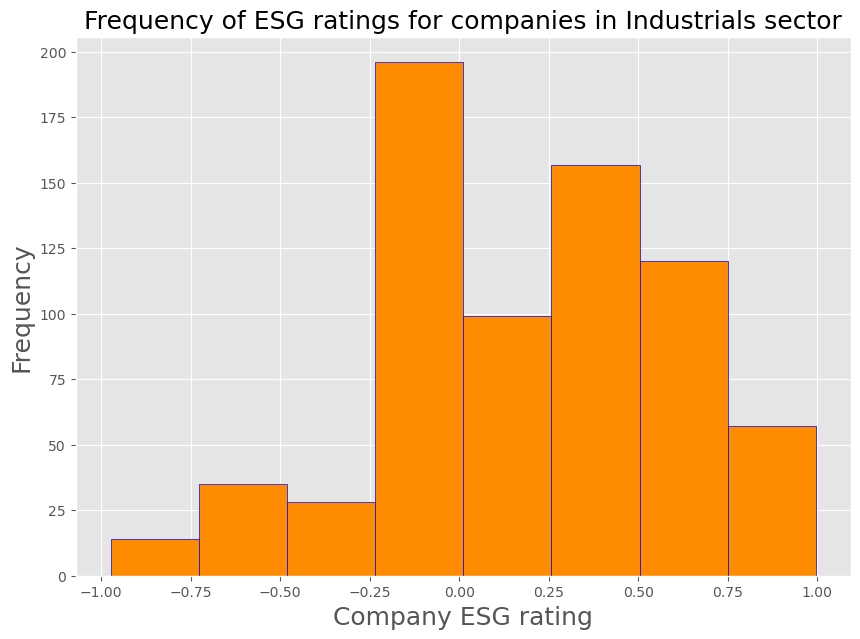

In [24]:
# Plot a histogram of the company pulse data; histograms are a graphic representation of numerical data distribution
# Using MATPLOTLIB library
data = df1.Company_ESG_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 8, color='darkorange', edgecolor='blue')

#plt.rcParams['figure.figsize'] = [10,10]
#plt.figure(figsize=(5,5))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel("Company ESG rating", fontsize=18)
plt.title("Frequency of ESG ratings for companies in Industrials sector", fontsize=18)

# Use plt.savefig to save your plot as an image file
# Note that plt.show( should be placed AFTER plt.savefig() otherwise plt.savefig() will just save a blank figure)

#plt.savefig('frequency-ESG-ratings.png',bbox_inches='tight')
plt.show()

# We can see that most companies in the Industrials sector have ESG ratings in the range of -0.25 to 0, these are fairly low scores.

### Plotly chart

In [25]:
# See https://python-charts.com/ranking/bar-chart-plotly/

In [26]:
# Let's find out the mean/ average of company pulse scores for each SubIndustry
grouped = df1.groupby(['GIC_subindustry'])['Company_ESG_pulse'].mean()
grouped
# After using .groupby(), the variable "grouped" is now a Pandas series (series is structure for a single column of dataframe; can hold data of any type; the first column of series is the index & second column is the data)

GIC_subindustry
Aerospace & Defense                      0.187284
Agricultural & Farm Machinery            0.328345
Air Freight & Logistics                  0.201336
Airlines                                 0.193311
Airport Services                         0.054319
Building Products                        0.400397
Building Products & Equipment            0.577030
Commercial Printing                      0.053740
Communications Equipment                 0.254633
Construction & Engineering               0.166166
Construction Machinery & Heavy Trucks    0.259871
Diversified Support Services             0.256206
Electrical Components & Equipment        0.308939
Electronic Components                    0.937100
Electronic Manufacturing Services        0.000000
Environmental & Facilities Services      0.049674
Heavy Electrical Equipment               0.454551
Highways & Railtracks                    0.035554
Human Resource & Employment Services     0.256623
Industrial Conglomerates          

In [27]:
# Convert the pandas series "grouped" to a dataframe
grouped_df = grouped.to_frame().reset_index()
grouped_df

# grouped_df shows the average ESG score for each subindustry in the Industrials sector

GIC_subindustry  Company_ESG_pulse
0                     Aerospace & Defense           0.187284
1           Agricultural & Farm Machinery           0.328345
2                 Air Freight & Logistics           0.201336
3                                Airlines           0.193311
4                        Airport Services           0.054319
5                       Building Products           0.400397
6           Building Products & Equipment           0.577030
7                     Commercial Printing           0.053740
8                Communications Equipment           0.254633
9              Construction & Engineering           0.166166
10  Construction Machinery & Heavy Trucks           0.259871
11           Diversified Support Services           0.256206
12      Electrical Components & Equipment           0.308939
13                  Electronic Components           0.937100
14      Electronic Manufacturing Services           0.000000
15    Environmental & Facilities Services           0.049674
16             Heavy Electrical Equipment           0.454551
17                  Highways & Railtracks           0.035554
18   Human Resource & Employment Services           0.256623
19               Industrial Conglomerates           0.116940
20                   Industrial Machinery           0.201863
21                                 Marine           0.131953
22                Marine Ports & Services          -0.015285
23             Office Services & Supplies           0.252509
24                              Railroads           0.063297
25         Research & Consulting Services           0.222703
26              Security & Alarm Services           0.232249
27          Specialized Consumer Services           0.103941
28         Specialty Industrial Machinery           0.152713
29       Trading Companies & Distributors           0.236363
30                               Trucking           0.151287

In [28]:
grouped_df.dtypes

GIC_subindustry       object
Company_ESG_pulse    float64
dtype: object

In [29]:
type(grouped_df)

pandas.core.frame.DataFrame

In [30]:
# Plotly plots values in the order they appear in the dataframe so it helps to sort values before plotting if you want them in ascending or descending order
grouped_df_sorted = grouped_df.sort_values(by=['Company_ESG_pulse'], ascending=False)
grouped_df_sorted

GIC_subindustry  Company_ESG_pulse
13                  Electronic Components           0.937100
6           Building Products & Equipment           0.577030
16             Heavy Electrical Equipment           0.454551
5                       Building Products           0.400397
1           Agricultural & Farm Machinery           0.328345
12      Electrical Components & Equipment           0.308939
10  Construction Machinery & Heavy Trucks           0.259871
18   Human Resource & Employment Services           0.256623
11           Diversified Support Services           0.256206
8                Communications Equipment           0.254633
23             Office Services & Supplies           0.252509
29       Trading Companies & Distributors           0.236363
26              Security & Alarm Services           0.232249
25         Research & Consulting Services           0.222703
20                   Industrial Machinery           0.201863
2                 Air Freight & Logistics           0.201336
3                                Airlines           0.193311
0                     Aerospace & Defense           0.187284
9              Construction & Engineering           0.166166
28         Specialty Industrial Machinery           0.152713
30                               Trucking           0.151287
21                                 Marine           0.131953
19               Industrial Conglomerates           0.116940
27          Specialized Consumer Services           0.103941
24                              Railroads           0.063297
4                        Airport Services           0.054319
7                     Commercial Printing           0.053740
15    Environmental & Facilities Services           0.049674
17                  Highways & Railtracks           0.035554
14      Electronic Manufacturing Services           0.000000
22                Marine Ports & Services          -0.015285

In [31]:
# Remember that some of the subindustries only have 1 company included in this dataset so the ESG pulse score for those companies is not an average
df1.GIC_subindustry.value_counts()

GIC_subindustry
Industrial Machinery                     96
Trading Companies & Distributors         58
Electrical Components & Equipment        53
Aerospace & Defense                      51
Construction & Engineering               44
Building Products                        36
Construction Machinery & Heavy Trucks    35
Research & Consulting Services           33
Marine                                   32
Airlines                                 31
Environmental & Facilities Services      27
Trucking                                 27
Human Resource & Employment Services     22
Industrial Conglomerates                 21
Diversified Support Services             17
Air Freight & Logistics                  17
Office Services & Supplies               16
Heavy Electrical Equipment               15
Railroads                                11
Airport Services                         10
Agricultural & Farm Machinery             8
Commercial Printing                       7
Highways & Railt

In [32]:
# Round the company_pulse values to 4 decimal points
# Lambda functions can be used when you need an "anonymous" function for a short period of time, such as in the code below where we are using it to round all of the pulse numbers
grouped_df_sorted['Company_ESG_pulse'] = grouped_df_sorted['Company_ESG_pulse'].apply(lambda x: round(x,4))
grouped_df_sorted

GIC_subindustry  Company_ESG_pulse
13                  Electronic Components             0.9371
6           Building Products & Equipment             0.5770
16             Heavy Electrical Equipment             0.4546
5                       Building Products             0.4004
1           Agricultural & Farm Machinery             0.3283
12      Electrical Components & Equipment             0.3089
10  Construction Machinery & Heavy Trucks             0.2599
18   Human Resource & Employment Services             0.2566
11           Diversified Support Services             0.2562
8                Communications Equipment             0.2546
23             Office Services & Supplies             0.2525
29       Trading Companies & Distributors             0.2364
26              Security & Alarm Services             0.2322
25         Research & Consulting Services             0.2227
20                   Industrial Machinery             0.2019
2                 Air Freight & Logistics             0.2013
3                                Airlines             0.1933
0                     Aerospace & Defense             0.1873
9              Construction & Engineering             0.1662
28         Specialty Industrial Machinery             0.1527
30                               Trucking             0.1513
21                                 Marine             0.1320
19               Industrial Conglomerates             0.1169
27          Specialized Consumer Services             0.1039
24                              Railroads             0.0633
4                        Airport Services             0.0543
7                     Commercial Printing             0.0537
15    Environmental & Facilities Services             0.0497
17                  Highways & Railtracks             0.0356
14      Electronic Manufacturing Services             0.0000
22                Marine Ports & Services            -0.0153

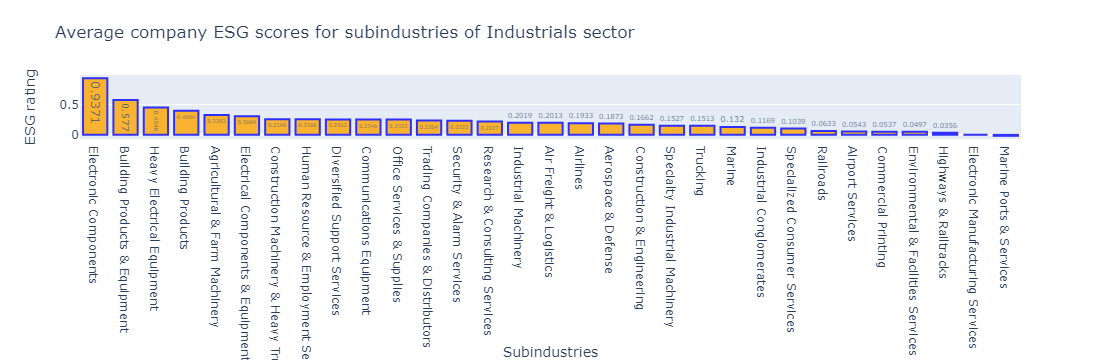

In [33]:
# Plot bar chart using Plotly library
fig = px.bar(grouped_df_sorted,
             x ="GIC_subindustry", 
             y="Company_ESG_pulse", 
             title ="Average company ESG scores for subindustries of Industrials sector",
             text_auto= True,
             labels={"GIC_subindustry": "Subindustries",
                     "Company_ESG_pulse": "ESG rating"
                    }
             )

# Use fig.update_traces to update a plot with other features; "marker" typically means a point in your chart, it is the bars in this example
# Here, we are adding colors for the bars, making the bar outlines blue, making the width of the outlines of the bars = 2, and changing the opacity (values used can be 0-1))
fig.update_traces(marker_color='orange', marker_line_color='blue',
                 marker_line_width=2, opacity=0.8)

fig.show()

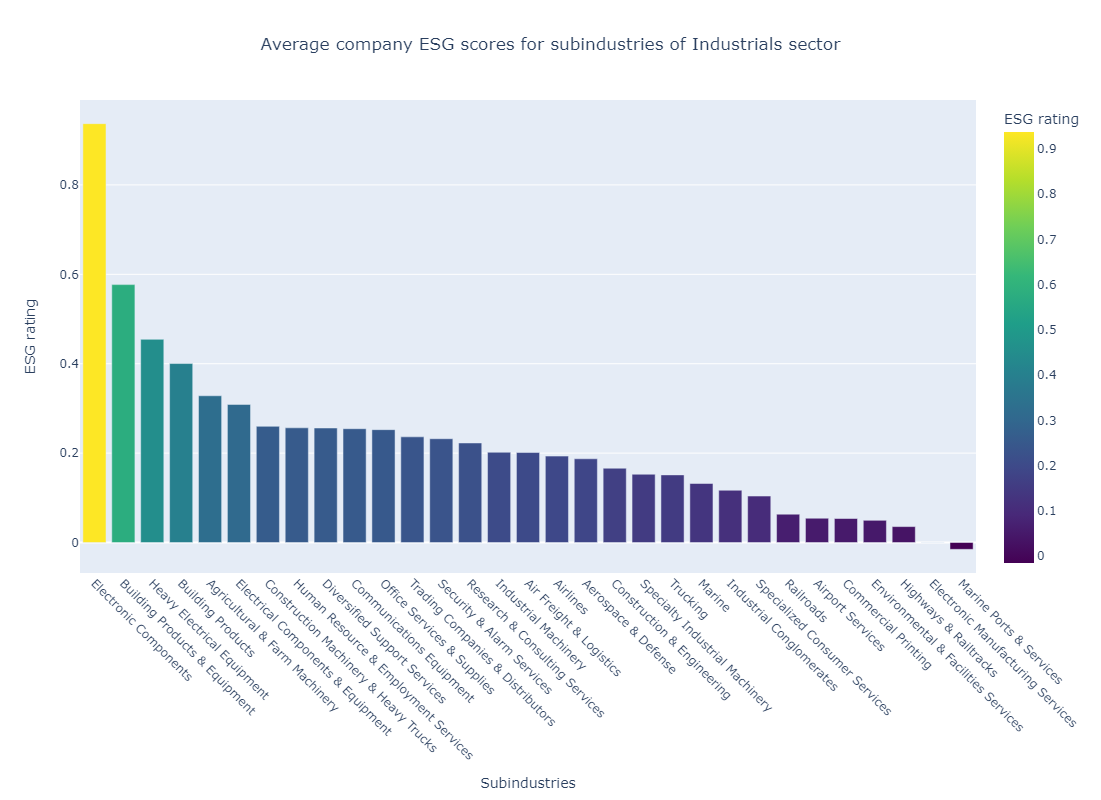

<Figure size 1000x700 with 0 Axes>

In [68]:
# The code is the same in this block as in the above EXCEPT for"
# -adding   fig.update_layout(autosize=False, width=800, height=800)  to make the chart larger and more readable    
# -adding hover_data so that the scores show up when hovering over them with the mouse instead of being static in the bars
# - adding color_continuous_scale to change the color of the bars
# commenting out/ removing the    fig.update_traces with marker color bc we are using the color continuous instead of markers now
fig = px.bar(grouped_df_sorted,
             x ="GIC_subindustry", 
             y="Company_ESG_pulse", 
             title ="Average company ESG scores for subindustries of Industrials sector",
             hover_data=['GIC_subindustry','Company_ESG_pulse'], color='Company_ESG_pulse',
             color_continuous_scale = 'Viridis',
             labels={"GIC_subindustry": "Subindustries",
                     "Company_ESG_pulse": "ESG rating"
                    }
             )

fig.update_layout(autosize=False, width=800, height=800, title_x=0.5)   # adding title_x=0.5 centers the title
fig.update_xaxes(tickangle=45)   # this angles the labels on the x axis
# Use fig.update_traces to update a plot with other features; "marker" typically means a point in your chart, it is the bars in this example
# Here, we are adding colors for the bars, making the bar outlines blue, making the width of the outlines of the bars = 2, and changing the opacity (values used can be 0-1))
#fig.update_traces(marker_color='orange', marker_line_color='blue',
# marker_line_width=2, opacity=0.8)

fig.show()
plt.savefig('avg-ESG-ratings.png',bbox_inches='tight')

# Notice that a menu now shows up when you hover in the upper right hand corner of the chart - since we have added the hover_data argument (see https://plotly.com/python/hover-text-and-formatting/)

In [35]:
# Note that for Plotly, "Static image generation requires either Kaleido (recommended, supported as of plotly 4.9) or orca (legacy as of plotly 4.9). The kaleido package can be installed using pip..."

#pip install -U kaleido

### Boxplot

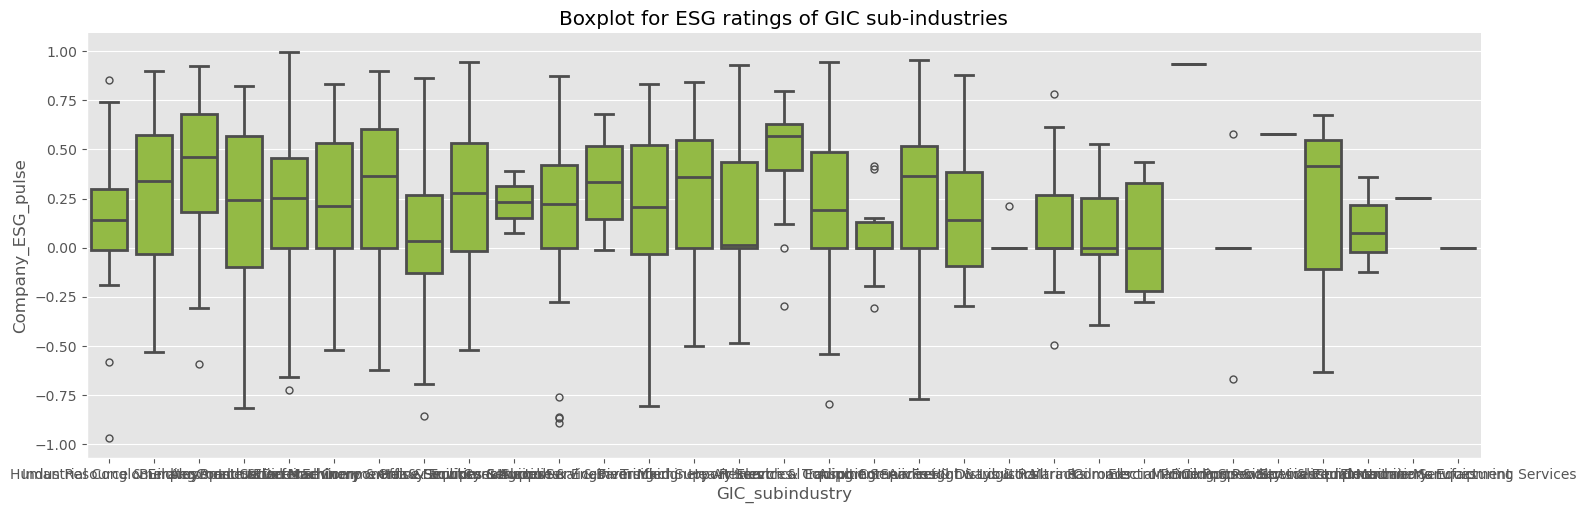

In [36]:
# Check out the relationship between a categorical variable (GIC Subindustry) and a numerical one (company ESG pulse) using a boxplot
# Using Seaborn and Matplotlib
# We will fix the x axis labels in the next step - this is to show the chart before adjusting the labels
sns.catplot(x='GIC_subindustry', y="Company_ESG_pulse", data=df1, kind="box", linewidth=2, color='yellowgreen',aspect=3.0)
plt.title("Boxplot for ESG ratings of GIC sub-industries")

plt.show()

# The limits of the boxes indicate the range of the CENTRAL 50% OF THE DATA, the central horizontal line marks the median, 
# the lines that extend from each box capture the range of the remaining data
# any dots beyond the line edges show outliers


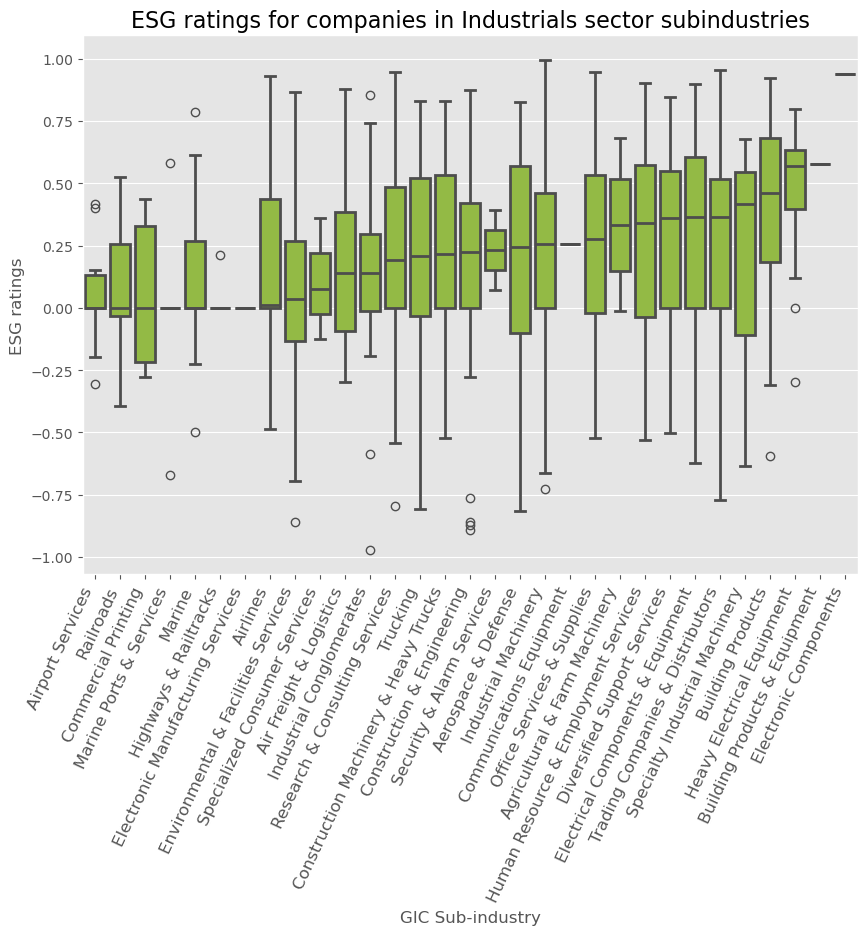

In [70]:
# Sort the boxplot by median of company_pulse values so the boxplot is easier to read (ascending values)
# Rotate the x axis labels - using   rotation=65

grouped_box = df1.loc[:,["GIC_subindustry", "Company_ESG_pulse"]]\
    .groupby(["GIC_subindustry"])\
    .median()\
    .sort_values(by="Company_ESG_pulse")
sns.boxplot(x=df1.GIC_subindustry, y=df1.Company_ESG_pulse, order=grouped_box.index, linewidth=2, color='yellowgreen')

plt.xticks(rotation=65, fontsize='large', ha='right')  # "ha" means horizontal alignment, if you don't use this, the labels won't be centered well
plt.ylabel('ESG ratings', fontsize=12)
plt.xlabel("GIC Sub-industry", fontsize=12)
plt.title("ESG ratings for companies in Industrials sector subindustries", fontsize=16)
#    fontweight='light'

plt.savefig('boxplot-ESG-industrials.png',bbox_inches='tight')

plt.show()

In [38]:
### Explore "Trucking" Subindustry

In [39]:
df1.head()

Unique_id Symbol             Company_name                 Exchange  \
0    190179    MMM               3M Company  New York Stock Exchange   
1    205868   JOBS               51job, Inc                   Nasdaq   
2    191323    AOS  A. O. Smith Corporation  New York Stock Exchange   
3    206373   AAON                AAON, Inc                   Nasdaq   
4    190905    AIR                 AAR Corp  New York Stock Exchange   

    GIC_sector                       GIC_subindustry  Company_ESG_pulse  \
0  Industrials              Industrial Conglomerates          -0.083992   
1  Industrials  Human Resource & Employment Services           0.776978   
2  Industrials                     Building Products           0.251170   
3  Industrials                     Building Products           0.739143   
4  Industrials                   Aerospace & Defense           0.588800   

   ESG_beta   SNP  Sustainalytics  ... 52w_change price  \
0  0.010832  67.0            32.2  ...          -11.290   
1 -0.203820  89.0            15.2  ...              NaN   
2  0.159637  17.0            25.5  ...           19.470   
3       NaN   NaN             NaN  ...          -10.145   
4       NaN   NaN             NaN  ...            6.670   

   52w_change price percent  52w_average volume  \
0                    -10.83           1648276.0   
1                       NaN                 NaN   
2                     29.49            452457.0   
3                    -10.51            157665.0   
4                     12.26             74456.0   

                                  Name       Sector  \
0              3M Company Common Stock  Health Care   
1                                  NaN          NaN   
2  A.O. Smith Corporation Common Stock  Industrials   
3                                  NaN          NaN   
4               AAR Corp. Common Stock  Industrials   

                          Industry          isin      cusip  Securities_type  \
0       Medical/Dental Instruments  US88579Y1010  88579Y101     Common Stock   
1                              NaN  US3168271043  316827104     Common Stock   
2  Industrial Machinery/Components  US8318652091  831865209     Common Stock   
3                              NaN  US0003602069  000360206     Common Stock   
4                        Aerospace  US0003611052  000361105     Common Stock   

   Currency_code  
0            USD  
1            USD  
2            USD  
3            USD  
4            USD  

[5 rows x 31 columns]

In [40]:
df1["GIC_subindustry"].value_counts()

GIC_subindustry
Industrial Machinery                     96
Trading Companies & Distributors         58
Electrical Components & Equipment        53
Aerospace & Defense                      51
Construction & Engineering               44
Building Products                        36
Construction Machinery & Heavy Trucks    35
Research & Consulting Services           33
Marine                                   32
Airlines                                 31
Environmental & Facilities Services      27
Trucking                                 27
Human Resource & Employment Services     22
Industrial Conglomerates                 21
Diversified Support Services             17
Air Freight & Logistics                  17
Office Services & Supplies               16
Heavy Electrical Equipment               15
Railroads                                11
Airport Services                         10
Agricultural & Farm Machinery             8
Commercial Printing                       7
Highways & Railt

In [41]:
# Select only companies that are in the Trucking GIC SubIndustry and create new dataframe
df_trucking = df1[(df1)['GIC_subindustry']== 'Trucking']
df_trucking

Unique_id Symbol                              Company_name  \
14     190077   UHAL                                    AMERCO   
68     206165   ARCB                       ArcBest Corporation   
88     190511    CAR                    Avis Budget Group, Inc   
149    245088   CGIP                         Celadon Group Inc   
185    205756   CVTI        Covenant Transportation Group, Inc   
195    190914  DSDVF                         DSV Panalpina A/S   
201    205140   DSKE                               Daseke, Inc   
297    240352   GRAB                         Grab Holdings Ltd   
323    204494   HTLD                    Heartland Express, Inc   
329    204414    HTZ                Hertz Global Holdings, Inc   
374    190503   JBHT         J.B. Hunt Transport Services, Inc   
397    206139    KNX  Knight-Swift Transportation Holdings Inc   
410    207550   LSTR                      Landstar System, Inc   
431    204599   MRTN                     Marten Transport, Ltd   
476    205417   ODFL            Old Dominion Freight Line, Inc   
486    207234   PTSI       P.A.M. Transportation Services, Inc   
497    243674   PATI        Patriot Transportation Holding Inc   
533    244078   RRTS     Roadrunner Transportation Systems Inc   
543    191073      R                         Ryder System, Inc   
553    195173   SAIA                                 Saia, Inc   
556    194924   SNDR                   Schneider National, Inc   
644    240209    USX                 US Xpress Enterprises Inc   
645    194363   USAK                            USA Truck, Inc   
656    194402    ULH         Universal Logistics Holdings, Inc   
684    194185   WERN                   Werner Enterprises, Inc   
697    245941   YAYO                                 Yayyo Inc   
698    243219   YELL                               Yellow Corp   

                    Exchange   GIC_sector GIC_subindustry  Company_ESG_pulse  \
14                    Nasdaq  Industrials        Trucking           0.283550   
68                    Nasdaq  Industrials        Trucking          -0.657493   
88                    Nasdaq  Industrials        Trucking           0.369853   
149                     Pink  Industrials        Trucking          -0.527000   
185                   Nasdaq  Industrials        Trucking           0.779300   
195                     Pink  Industrials        Trucking           0.603138   
201                   Nasdaq  Industrials        Trucking           0.209068   
297                   Nasdaq  Industrials        Trucking           0.025800   
323                   Nasdaq  Industrials        Trucking           0.486900   
329  New York Stock Exchange  Industrials        Trucking          -0.066459   
374                   Nasdaq  Industrials        Trucking           0.799782   
397  New York Stock Exchange  Industrials        Trucking           0.197625   
410                   Nasdaq  Industrials        Trucking           0.361840   
431                   Nasdaq  Industrials        Trucking           0.218750   
476                   Nasdaq  Industrials        Trucking           0.148200   
486                   Nasdaq  Industrials        Trucking           0.612400   
497                   Nasdaq  Industrials        Trucking          -0.648600   
533                     Pink  Industrials        Trucking           0.000000   
543  New York Stock Exchange  Industrials        Trucking           0.456381   
553                   Nasdaq  Industrials        Trucking           0.831853   
556  New York Stock Exchange  Industrials        Trucking           0.556761   
644  New York Stock Exchange  Industrials        Trucking          -0.806167   
645                   Nasdaq  Industrials        Trucking          -0.213957   
656                   Nasdaq  Industrials        Trucking           0.000000   
684                   Nasdaq  Industrials        Trucking           0.792572   
697                     Pink  Industrials        Trucking          -0.72933

In [42]:
# View statistics of for the paper packaging sub-industry 
df_trucking.describe()

Company_ESG_pulse  ESG_beta        SNP  Sustainalytics  SNP_normalized  \
count          27.000000  5.000000   5.000000        5.000000        5.000000   
mean            0.151287  0.064622  43.400000       16.720000       43.400000   
std             0.492536  0.212317  31.785217        3.706346       31.785217   
min            -0.806167 -0.270715  11.000000       11.700000       11.000000   
25%            -0.033230 -0.001094  22.000000       15.400000       22.000000   
50%             0.209068  0.126259  33.000000       16.200000       33.000000   
75%             0.521830  0.201589  62.000000       18.700000       62.000000   
max             0.831853  0.267072  89.000000       21.600000       89.000000   

       Sustainalytics_normalized  MSCI_normalized        Volume    Market Cap  \
count                   5.000000         5.000000  4.000000e+00  4.000000e+00   
mean                   41.800000        57.120000  4.999295e+05  7.475370e+09   
std                     9.265865        17.489357  7.041937e+05  3.894519e+09   
min                    29.250000        42.840000  3.905400e+04  3.859362e+09   
25%                    38.500000        42.840000  8.751600e+04  4.816603e+09   
50%                    40.500000        57.120000  2.097140e+05  6.721076e+09   
75%                    46.750000        57.120000  6.221275e+05  9.379843e+09   
max                    54.000000        85.680000  1.541236e+06  1.259996e+10   

       52w_highest price  52w_lowest price  52w_change price  \
count          14.000000         14.000000         14.000000   
mean           27.743571         14.375714         -1.727214   
std            32.059165         21.587608         13.916965   
min             0.470000          0.000000        -35.290000   
25%             8.002500          1.085000         -5.746250   
50%            17.810000          5.470000         -0.525500   
75%            36.285000         19.385000          2.735000   
max           121.580000         75.000000         29.870000   

       52w_change price percent  52w_average volume  
count                 14.000000        1.400000e+01  
mean                  -6.745000        1.099587e+06  
std                   68.460285        2.339253e+06  
min                 -100.000000        1.892000e+03  
25%                  -52.520000        1.177550e+04  
50%                  -12.270000        1.440440e+05  
75%                   16.075000        7.336090e+05  
max                  129.100000        8.419389e+06

In [43]:
# use sort_values() to sort the "company_pulse" column, create a new dataframe called df_trucking2
df_trucking2 = df_trucking.sort_values('Company_ESG_pulse', ascending =False)

# reset the index of the dataframe and use drop=True to remove the "old" index
df_trucking2.reset_index(drop=True)

Unique_id Symbol                              Company_name  \
0     195173   SAIA                                 Saia, Inc   
1     190503   JBHT         J.B. Hunt Transport Services, Inc   
2     194185   WERN                   Werner Enterprises, Inc   
3     205756   CVTI        Covenant Transportation Group, Inc   
4     207234   PTSI       P.A.M. Transportation Services, Inc   
5     190914  DSDVF                         DSV Panalpina A/S   
6     194924   SNDR                   Schneider National, Inc   
7     204494   HTLD                    Heartland Express, Inc   
8     191073      R                         Ryder System, Inc   
9     190511    CAR                    Avis Budget Group, Inc   
10    207550   LSTR                      Landstar System, Inc   
11    190077   UHAL                                    AMERCO   
12    204599   MRTN                     Marten Transport, Ltd   
13    205140   DSKE                               Daseke, Inc   
14    206139    KNX  Knight-Swift Transportation Holdings Inc   
15    205417   ODFL            Old Dominion Freight Line, Inc   
16    240352   GRAB                         Grab Holdings Ltd   
17    244078   RRTS     Roadrunner Transportation Systems Inc   
18    194402    ULH         Universal Logistics Holdings, Inc   
19    243219   YELL                               Yellow Corp   
20    204414    HTZ                Hertz Global Holdings, Inc   
21    194363   USAK                            USA Truck, Inc   
22    245088   CGIP                         Celadon Group Inc   
23    243674   PATI        Patriot Transportation Holding Inc   
24    206165   ARCB                       ArcBest Corporation   
25    245941   YAYO                                 Yayyo Inc   
26    240209    USX                 US Xpress Enterprises Inc   

                   Exchange   GIC_sector GIC_subindustry  Company_ESG_pulse  \
0                    Nasdaq  Industrials        Trucking           0.831853   
1                    Nasdaq  Industrials        Trucking           0.799782   
2                    Nasdaq  Industrials        Trucking           0.792572   
3                    Nasdaq  Industrials        Trucking           0.779300   
4                    Nasdaq  Industrials        Trucking           0.612400   
5                      Pink  Industrials        Trucking           0.603138   
6   New York Stock Exchange  Industrials        Trucking           0.556761   
7                    Nasdaq  Industrials        Trucking           0.486900   
8   New York Stock Exchange  Industrials        Trucking           0.456381   
9                    Nasdaq  Industrials        Trucking           0.369853   
10                   Nasdaq  Industrials        Trucking           0.361840   
11                   Nasdaq  Industrials        Trucking           0.283550   
12                   Nasdaq  Industrials        Trucking           0.218750   
13                   Nasdaq  Industrials        Trucking           0.209068   
14  New York Stock Exchange  Industrials        Trucking           0.197625   
15                   Nasdaq  Industrials        Trucking           0.148200   
16                   Nasdaq  Industrials        Trucking           0.025800   
17                     Pink  Industrials        Trucking           0.000000   
18                   Nasdaq  Industrials        Trucking           0.000000   
19                   Nasdaq  Industrials        Trucking           0.000000   
20  New York Stock Exchange  Industrials        Trucking          -0.066459   
21                   Nasdaq  Industrials        Trucking          -0.213957   
22                     Pink  Industrials        Trucking          -0.527000   
23                   Nasdaq  Industrials        Trucking          -0.648600   
24                   Nasdaq  Industrials        Trucking          -0.657493   
25                     Pink  Industrials        Trucking          -0.729335   
26  New York Stock Exchange  Industrials        T

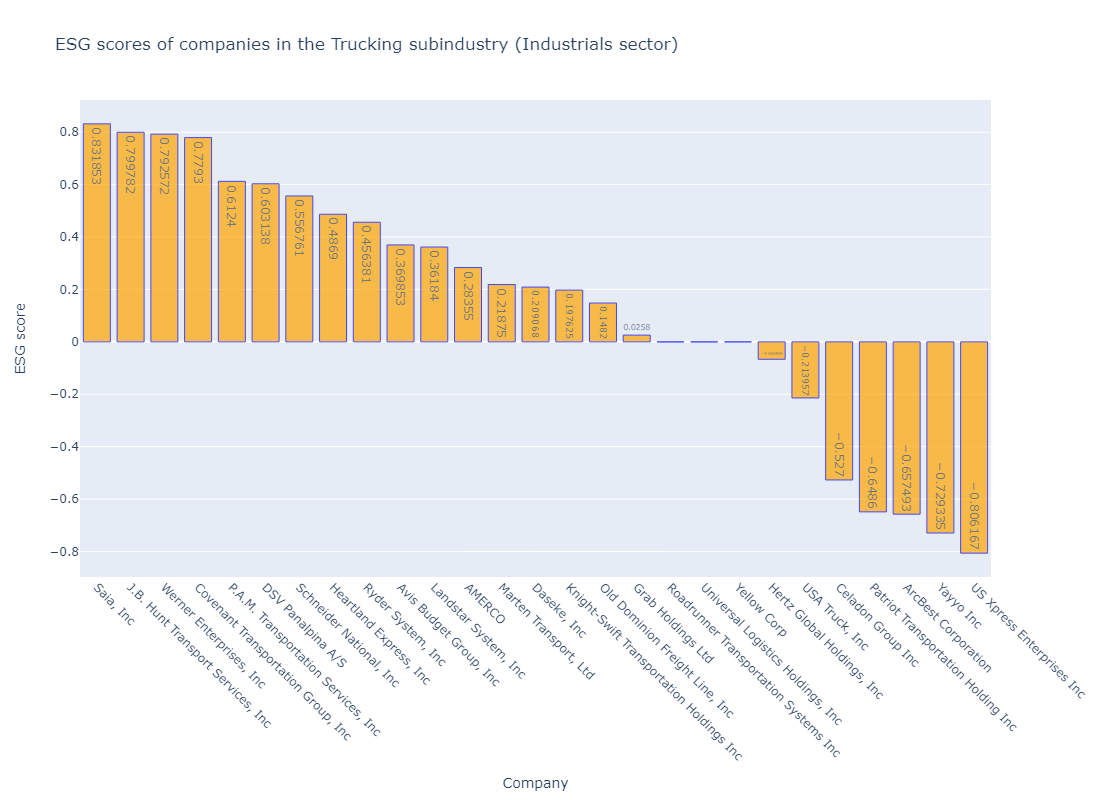

In [44]:
#Plot a simple bar chart using Plotly library ("px")

# See https://www.storytellingwithdata.com/blog/2020/2/19/what-is-a-bar-chart
# Bar charts are helpful when you want to compare across categories (ESG scores of copmanies in the Trucking subindustry, in this example)
# This chart can answer questions such as: Which trucking company has the best ESG score and which has the worst?

# See helpful Plotly cheatsheet from datacamp: https://www.datacamp.com/cheat-sheet/plotly-express-cheat-sheet

fig = px.bar(df_trucking2,
             x ="Company_name", 
             y="Company_ESG_pulse", 
             title ="ESG scores of companies in the Trucking subindustry (Industrials sector)",
             text_auto= True,  
             labels={"Company_name": "Company",
                     "Company_ESG_pulse": "ESG score"
                    }
             )

#plt.xticks(rotation=65, fontsize='large', ha='right')
# The code below updates the bar chart we called "fig" using fig.update_traces()
fig.update_traces(marker_color='orange', marker_line_color='blue',
                 marker_line_width=1, opacity=0.7)
fig.update_layout(autosize=False, width=800, height=800)
fig.update_xaxes(tickangle=45)

#fig.show()

### Another version of a bar chart showing ESG scores

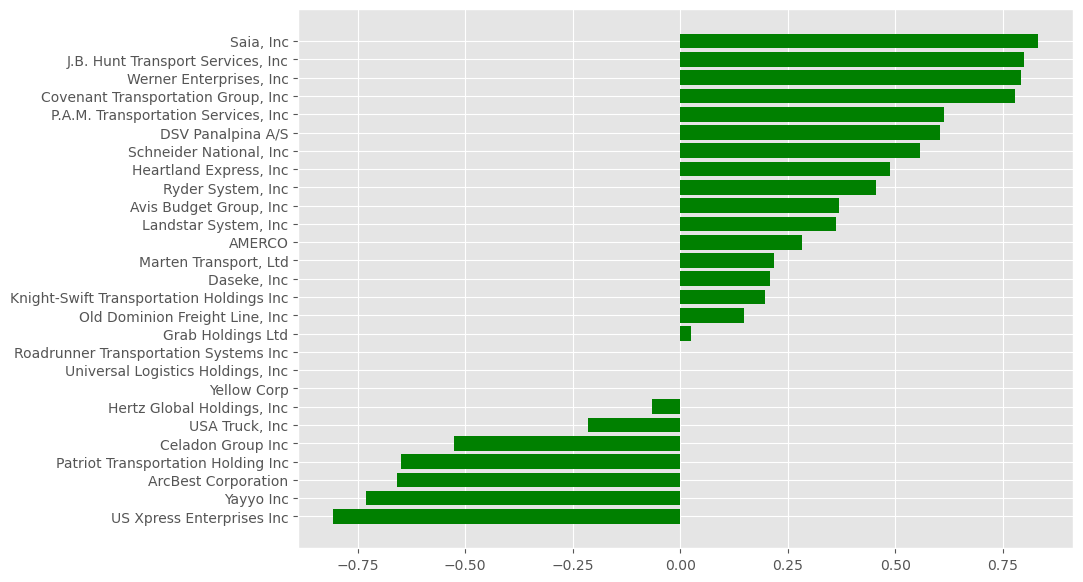

In [45]:
# Create bar chart using Matplotlib 
# See https://towardsdatascience.com/7-steps-to-help-you-make-your-matplotlib-bar-charts-beautiful-f87419cb14cb

df_trucking3 = df_trucking2.sort_values('Company_ESG_pulse').reset_index(drop=True)

# By using plot.subplot() funtion, we could create multiple charts/ plots within a single "figure" 
# allows control over how the individual plots are created
# See https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
#fig, ax = plt.subplot(figsize=(10,7))

plt.barh(df_trucking3['Company_name'],df_trucking3['Company_ESG_pulse'], color='green')

# For description of formatting spines (the lines confining a chart's area): https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)

# see https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9
plt.show()

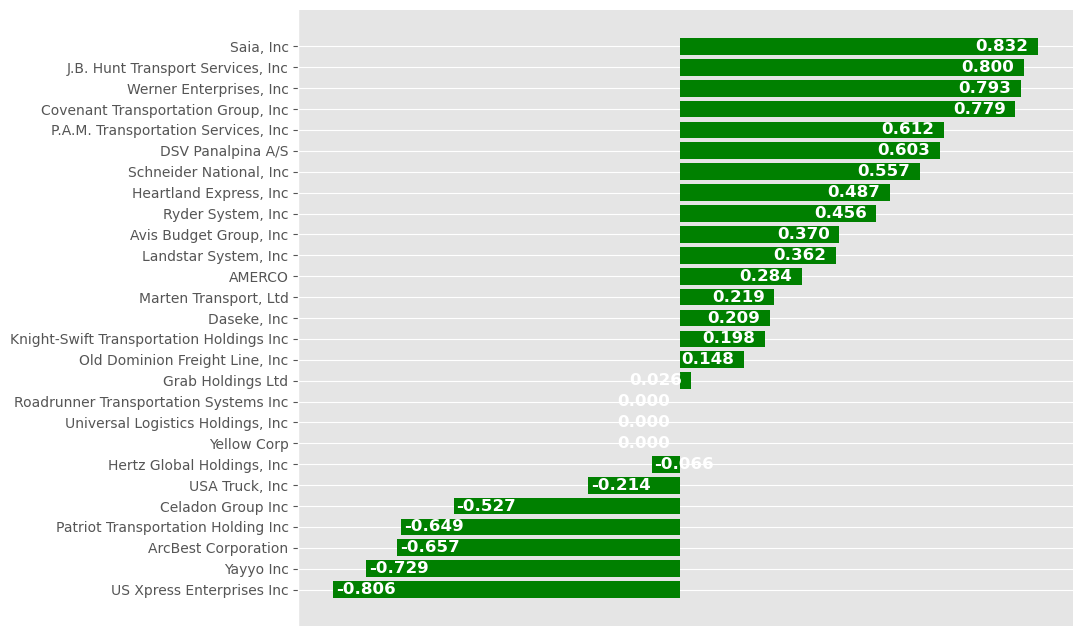

In [46]:
# We will now use most of the same code but will add white labels in the bars to show the ESG scores more clearly

df_trucking3 = df_trucking2.sort_values('Company_ESG_pulse').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10,8))

bars = plt.barh(df_trucking3['Company_name'],df_trucking3['Company_ESG_pulse'], color='green')

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
# Create labels using the bar_label function, this setting of "padding" places the labels just inside of ends of the bars
# fmt='%.3f' formats the numbers to 3 decimal places
ax.bar_label(bars, padding=-45, color='white',
            fontsize=12, label_type='edge', fmt='%.3f', fontweight='bold')

plt.show()

In [47]:
# As we see using  .describe(), The median (50%) ESG rating for trucking companies is 0.209068 
df_trucking.describe()

Company_ESG_pulse  ESG_beta        SNP  Sustainalytics  SNP_normalized  \
count          27.000000  5.000000   5.000000        5.000000        5.000000   
mean            0.151287  0.064622  43.400000       16.720000       43.400000   
std             0.492536  0.212317  31.785217        3.706346       31.785217   
min            -0.806167 -0.270715  11.000000       11.700000       11.000000   
25%            -0.033230 -0.001094  22.000000       15.400000       22.000000   
50%             0.209068  0.126259  33.000000       16.200000       33.000000   
75%             0.521830  0.201589  62.000000       18.700000       62.000000   
max             0.831853  0.267072  89.000000       21.600000       89.000000   

       Sustainalytics_normalized  MSCI_normalized        Volume    Market Cap  \
count                   5.000000         5.000000  4.000000e+00  4.000000e+00   
mean                   41.800000        57.120000  4.999295e+05  7.475370e+09   
std                     9.265865        17.489357  7.041937e+05  3.894519e+09   
min                    29.250000        42.840000  3.905400e+04  3.859362e+09   
25%                    38.500000        42.840000  8.751600e+04  4.816603e+09   
50%                    40.500000        57.120000  2.097140e+05  6.721076e+09   
75%                    46.750000        57.120000  6.221275e+05  9.379843e+09   
max                    54.000000        85.680000  1.541236e+06  1.259996e+10   

       52w_highest price  52w_lowest price  52w_change price  \
count          14.000000         14.000000         14.000000   
mean           27.743571         14.375714         -1.727214   
std            32.059165         21.587608         13.916965   
min             0.470000          0.000000        -35.290000   
25%             8.002500          1.085000         -5.746250   
50%            17.810000          5.470000         -0.525500   
75%            36.285000         19.385000          2.735000   
max           121.580000         75.000000         29.870000   

       52w_change price percent  52w_average volume  
count                 14.000000        1.400000e+01  
mean                  -6.745000        1.099587e+06  
std                   68.460285        2.339253e+06  
min                 -100.000000        1.892000e+03  
25%                  -52.520000        1.177550e+04  
50%                  -12.270000        1.440440e+05  
75%                   16.075000        7.336090e+05  
max                  129.100000        8.419389e+06

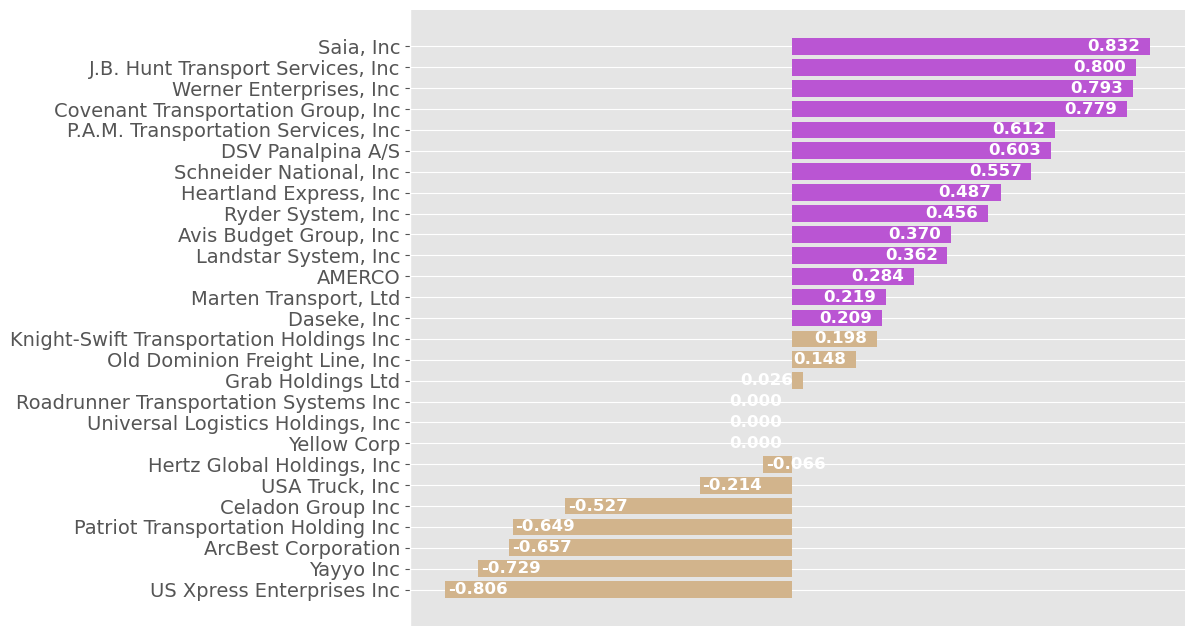

In [48]:
# We will now add coloring to the labels to discern those above and below a certain threshold (the median of the company_pulse in this case, which is 0.209068)
# Matplotlib

medianpulse = 0.209068  # see 50% value in the cell where we viewed df_trucking.describe()
highlight_color = '#BA55D3'  # mediumorchid, HEX code is BA55D3
nonhighlight = '#D2B48C'  # tan, HEX code is D2B48C

# Again, lambda function is essentially a one-line function without a name that is used ad-hoc and won't be needed again, hence it doesn't need a name; see https://www.reddit.com/r/learnpython/comments/ool7m8/what_in_the_hell_is_lambda/
# We want the color for companies with values above "medianpulse" to have "highlight_color" and
# else we want companies that are not equal or greater than "medianpulse" to have gray colored bars
df_trucking3['colors'] = df_trucking3['Company_ESG_pulse'].apply(lambda x: highlight_color if x >= medianpulse else nonhighlight)

# Using subplots eventhough there will be only one plot on our figure for now
fig, ax = plt.subplots(figsize=(10,8))

bars = plt.barh(df_trucking3['Company_name'],df_trucking3['Company_ESG_pulse'], color=df_trucking3['colors'])

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=14)
ax.bar_label(bars, padding=-45, color='white',
            fontsize=12, label_type='edge', fmt='%.3f', fontweight='bold')

plt.show()

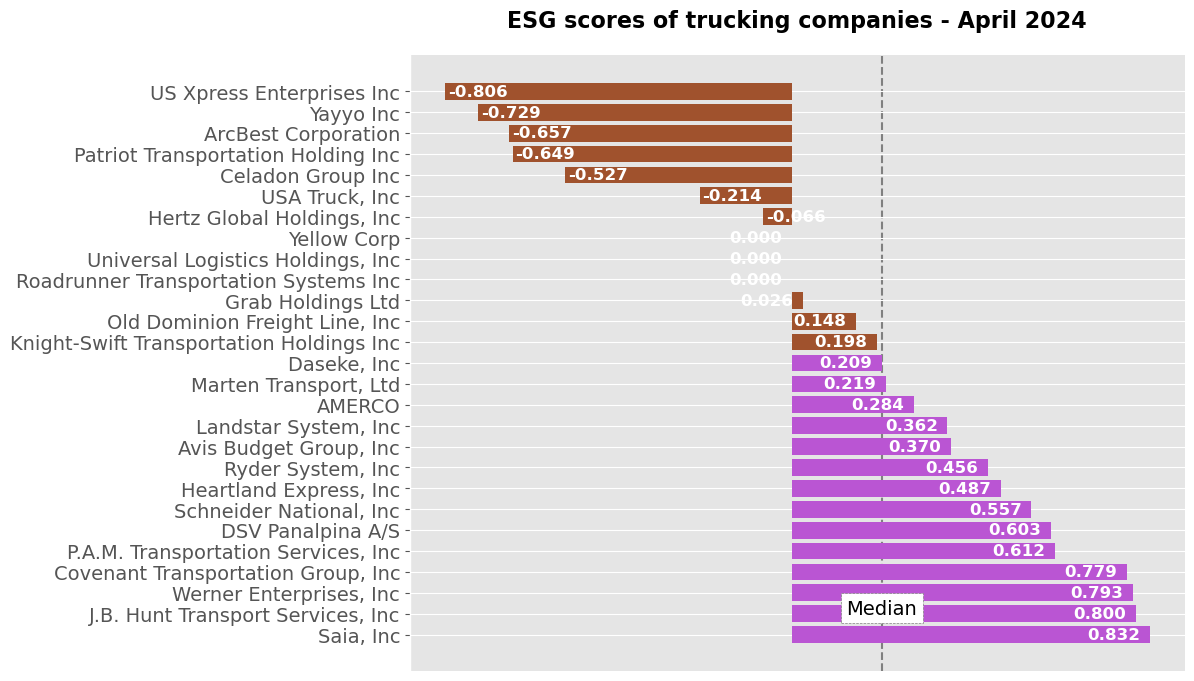

In [49]:
# Now we will add a median line to show why we are coloring companies orange vs. gray (so it's easier for the reader to understand at a glance)

medianpulse = 0.209068
highlight_color = '#BA55D3'
nonhighlight = '#A0522D'  # changed color to "Sienna", a darker brown, so that the numbers are easier to read

df_trucking2['colors'] = df_trucking2['Company_ESG_pulse'].apply(lambda x: highlight_color if x >= medianpulse else nonhighlight)

fig, ax = plt.subplots(figsize=(10,8))

bars = plt.barh(df_trucking2['Company_name'],df_trucking2['Company_ESG_pulse'], color=df_trucking2['colors'])

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=14)
ax.bar_label(bars, padding=-45, color='white',
            fontsize=12, label_type='edge', fmt='%.3f', fontweight='bold')

ax.yaxis.set_tick_params(labelsize=14)
# The code below creates the dotted gray line that is our line showing the median value of the company-pulse values
ax.axvline(x=0.209068, zorder=0, color='gray', ls='--', lw=1.5)  # creates the dotted gray line; "zorder" affects whether the line is to the front or back, etc. of the bars or other elements, in this case we set it to 0 so it's in the background
ax.text(x=0.209068, y=1, s='Median', ha='center', fontsize=14, bbox=dict(facecolor='white', edgecolor='gray', ls='--'))

# Title our plot
ax.set_title("ESG scores of trucking companies - April 2024", fontsize=16,
            fontweight='bold', pad=20)

plt.show()

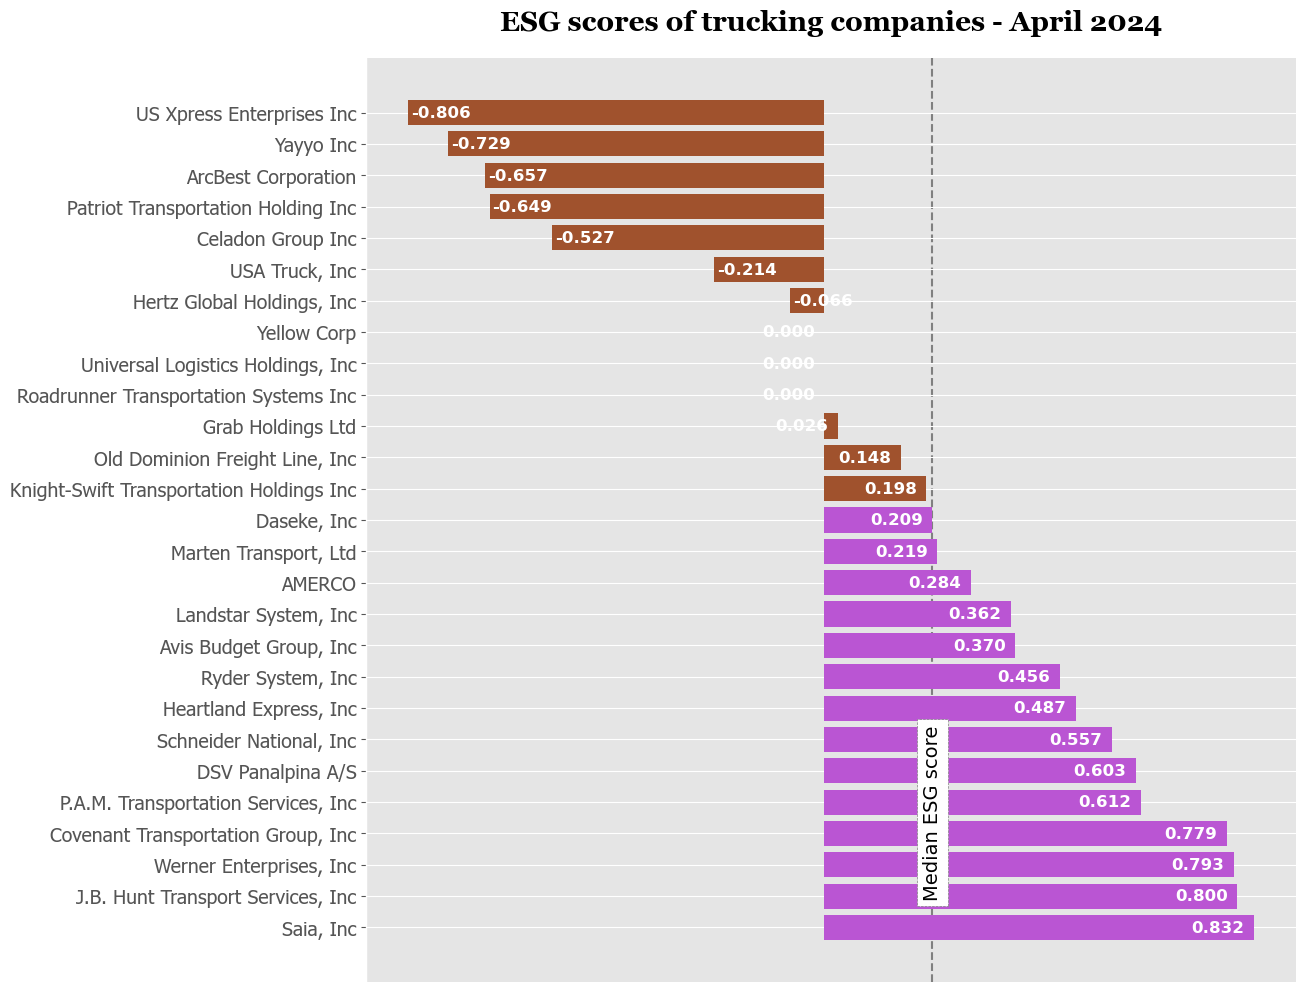

In [72]:
# Now we will change the font of our title and some labels
csfont = {'fontname': 'Georgia'}
hfont = {'fontname': 'Tahoma'}

medianpulse = 0.209068

# For list of codes for different colors (the below codes are HEX), see https://htmlcolorcodes.com/color-names/
highlight_color = '#BA55D3'
nonhighlight = '#A0522D'

df_trucking2['colors'] = df_trucking2['Company_ESG_pulse'].apply(lambda x: highlight_color if x >= medianpulse else nonhighlight)

fig, ax = plt.subplots(figsize=(12,12))

bars = plt.barh(df_trucking2['Company_name'],df_trucking2['Company_ESG_pulse'], color=df_trucking2['colors'])

ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=14,labelfontfamily='tahoma')
ax.bar_label(bars, padding=-45, color='white',
            fontsize=12, label_type='edge', fmt='%.3f', fontweight='bold')

ax.axvline(x=0.209068, zorder=0, color='gray', ls='--', lw=1.5)
ax.text(x=0.209068, y=1, s='Median ESG score', ha='center', rotation=90, fontsize=14, bbox=dict(facecolor='white', edgecolor='gray', ls='--'))
ax.set_title("ESG scores of trucking companies - April 2024", fontsize=20,
            fontweight='bold', pad=20,**csfont)

plt.savefig('trucking-april2024.png',bbox_inches='tight', transparent=False, dpi=500)
# Adding "dpi=500" helps increase image quality if you need to use your image file in a Powerpoint, etc.
# If you use transparent=True, you won't be able to tell that the background is transparent in your Jupyter nb, but you can tell when you place it in a slide, report, etc.
plt.show()

### Seaborn Pairplot

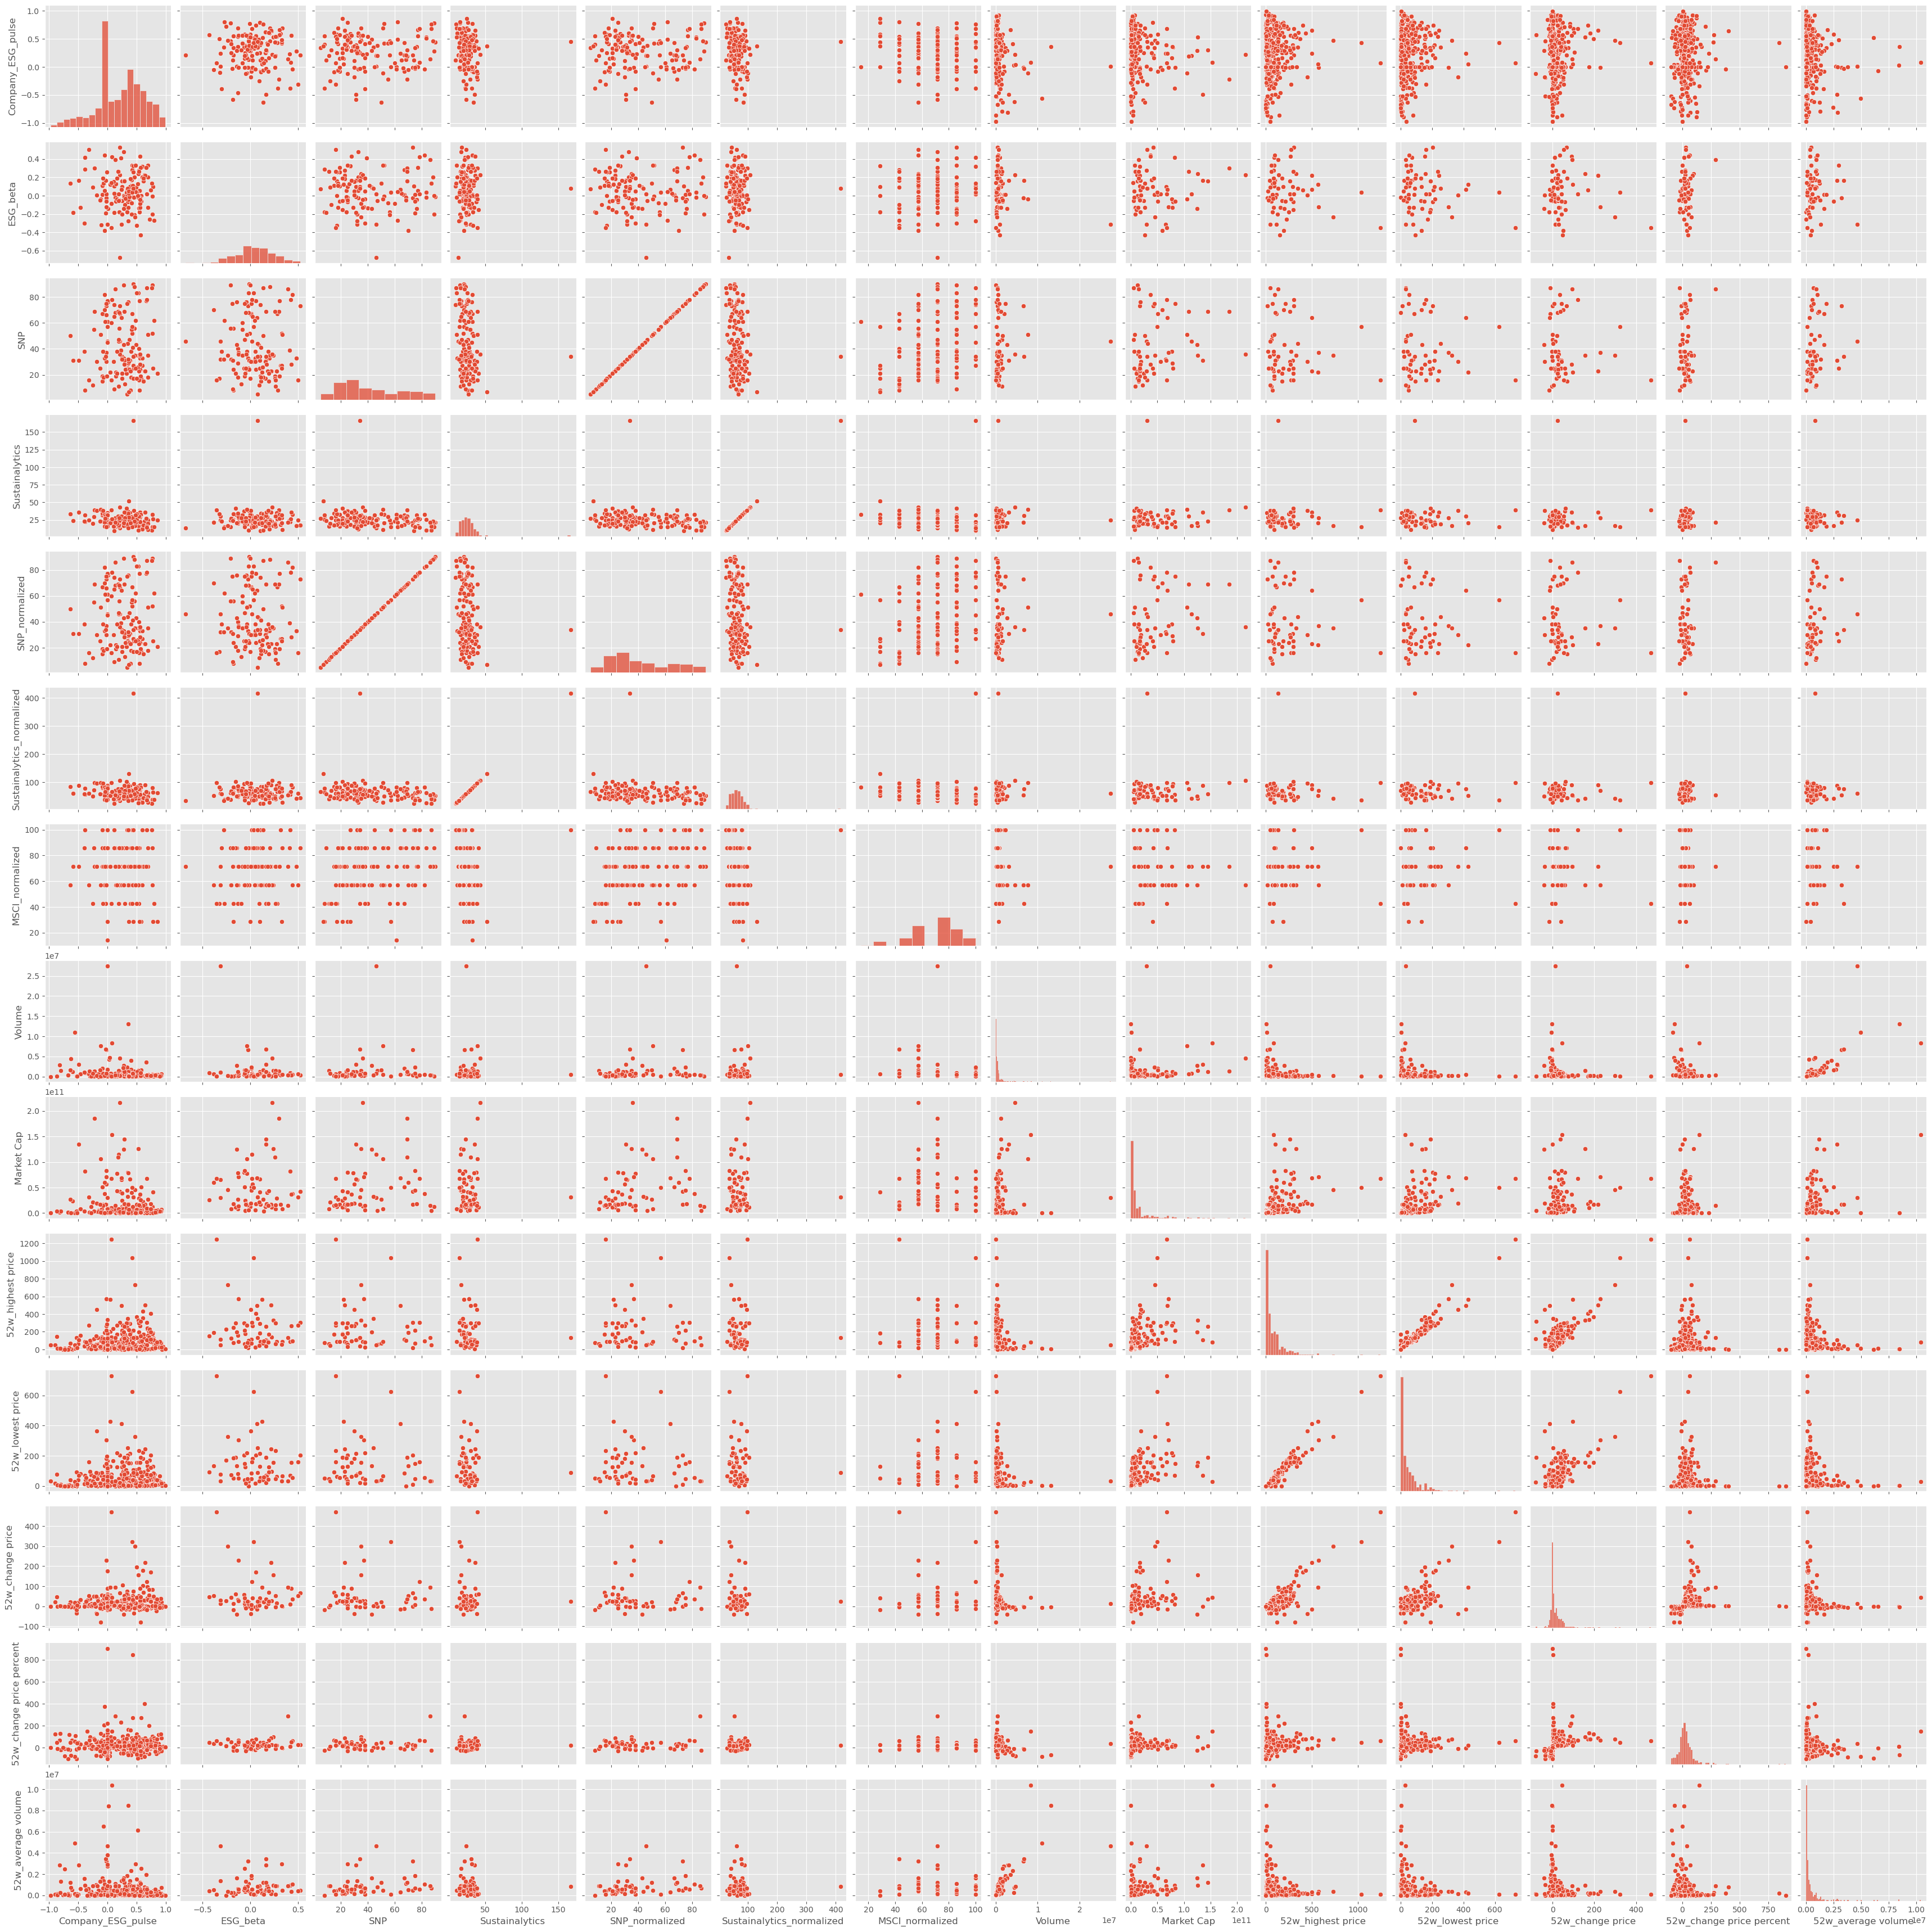

In [51]:
# Create a quick pairplot using seaborn
# This will help to find interesting relationships/ how variables may influence each other
sns.pairplot(df1)

### Scatterplot

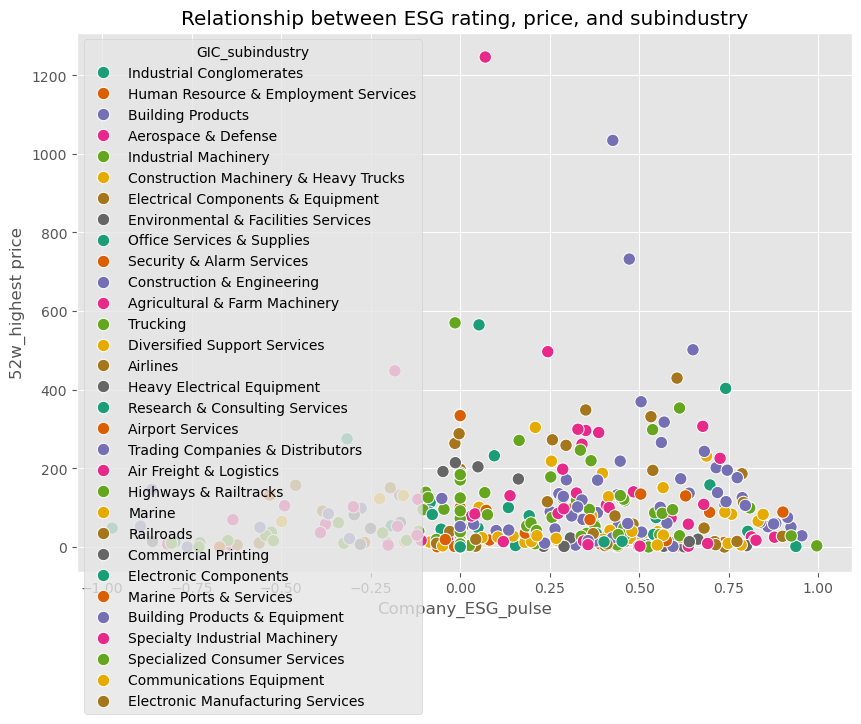

In [52]:
# Create scatterplot using matplotlib and seaborn
sns.scatterplot(x="Company_ESG_pulse", y="52w_highest price", hue="GIC_subindustry", data=df1, palette="Dark2", s=80)
plt.title("Relationship between ESG rating, price, and subindustry")
plt.show()

In [53]:
df1.head()

Unique_id Symbol             Company_name                 Exchange  \
0    190179    MMM               3M Company  New York Stock Exchange   
1    205868   JOBS               51job, Inc                   Nasdaq   
2    191323    AOS  A. O. Smith Corporation  New York Stock Exchange   
3    206373   AAON                AAON, Inc                   Nasdaq   
4    190905    AIR                 AAR Corp  New York Stock Exchange   

    GIC_sector                       GIC_subindustry  Company_ESG_pulse  \
0  Industrials              Industrial Conglomerates          -0.083992   
1  Industrials  Human Resource & Employment Services           0.776978   
2  Industrials                     Building Products           0.251170   
3  Industrials                     Building Products           0.739143   
4  Industrials                   Aerospace & Defense           0.588800   

   ESG_beta   SNP  Sustainalytics  ... 52w_change price  \
0  0.010832  67.0            32.2  ...          -11.290   
1 -0.203820  89.0            15.2  ...              NaN   
2  0.159637  17.0            25.5  ...           19.470   
3       NaN   NaN             NaN  ...          -10.145   
4       NaN   NaN             NaN  ...            6.670   

   52w_change price percent  52w_average volume  \
0                    -10.83           1648276.0   
1                       NaN                 NaN   
2                     29.49            452457.0   
3                    -10.51            157665.0   
4                     12.26             74456.0   

                                  Name       Sector  \
0              3M Company Common Stock  Health Care   
1                                  NaN          NaN   
2  A.O. Smith Corporation Common Stock  Industrials   
3                                  NaN          NaN   
4               AAR Corp. Common Stock  Industrials   

                          Industry          isin      cusip  Securities_type  \
0       Medical/Dental Instruments  US88579Y1010  88579Y101     Common Stock   
1                              NaN  US3168271043  316827104     Common Stock   
2  Industrial Machinery/Components  US8318652091  831865209     Common Stock   
3                              NaN  US0003602069  000360206     Common Stock   
4                        Aerospace  US0003611052  000361105     Common Stock   

   Currency_code  
0            USD  
1            USD  
2            USD  
3            USD  
4            USD  

[5 rows x 31 columns]

In [54]:
# The chart above is too hard to read
# Let's remove subindustries if there are less than 20 companies in the subindustry
df1.GIC_subindustry.value_counts()

GIC_subindustry
Industrial Machinery                     96
Trading Companies & Distributors         58
Electrical Components & Equipment        53
Aerospace & Defense                      51
Construction & Engineering               44
Building Products                        36
Construction Machinery & Heavy Trucks    35
Research & Consulting Services           33
Marine                                   32
Airlines                                 31
Environmental & Facilities Services      27
Trucking                                 27
Human Resource & Employment Services     22
Industrial Conglomerates                 21
Diversified Support Services             17
Air Freight & Logistics                  17
Office Services & Supplies               16
Heavy Electrical Equipment               15
Railroads                                11
Airport Services                         10
Agricultural & Farm Machinery             8
Commercial Printing                       7
Highways & Railt

In [55]:
# We will remove any rows that contain the following subindustries using .str.contains(); be careful that you don't have extra spaces or punctuation when using this
df_scatter = df1[df1["GIC_subindustry"].str.contains("Diversified Support Services|Air Freight & Logistics|Office Services & Supplies|Heavy Electrical Equipment| \
Railroads|Airport Services|Agricultural & Farm Machinery|Commercial Printing|Highways & Railtracks|Marine Ports & Services|Specialty Industrial Machinery| \
Specialized Consumer Services|Security & Alarm Services|Electronic Components|Building Products & Equipment|Communications Equipment|Electronic Manufacturing Services") == False]
df_scatter.info()                                                    

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 705
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unique_id                  580 non-null    object 
 1   Symbol                     579 non-null    object 
 2   Company_name               580 non-null    object 
 3   Exchange                   580 non-null    object 
 4   GIC_sector                 580 non-null    object 
 5   GIC_subindustry            580 non-null    object 
 6   Company_ESG_pulse          580 non-null    float64
 7   ESG_beta                   127 non-null    float64
 8   SNP                        127 non-null    float64
 9   Sustainalytics             130 non-null    float64
 10  MSCI                       112 non-null    object 
 11  SNP_normalized             127 non-null    float64
 12  Sustainalytics_normalized  130 non-null    float64
 13  MSCI_normalized            112 non-null    float64
 14 

In [56]:
df_scatter.dtypes

Unique_id                     object
Symbol                        object
Company_name                  object
Exchange                      object
GIC_sector                    object
GIC_subindustry               object
Company_ESG_pulse            float64
ESG_beta                     float64
SNP                          float64
Sustainalytics               float64
MSCI                          object
SNP_normalized               float64
Sustainalytics_normalized    float64
MSCI_normalized              float64
Update_date-ESG_scores        object
Address                       object
Country                       object
Volume                       float64
Market Cap                   float64
52w_highest price            float64
52w_lowest price             float64
52w_change price             float64
52w_change price percent     float64
52w_average volume           float64
Name                          object
Sector                        object
Industry                      object
i

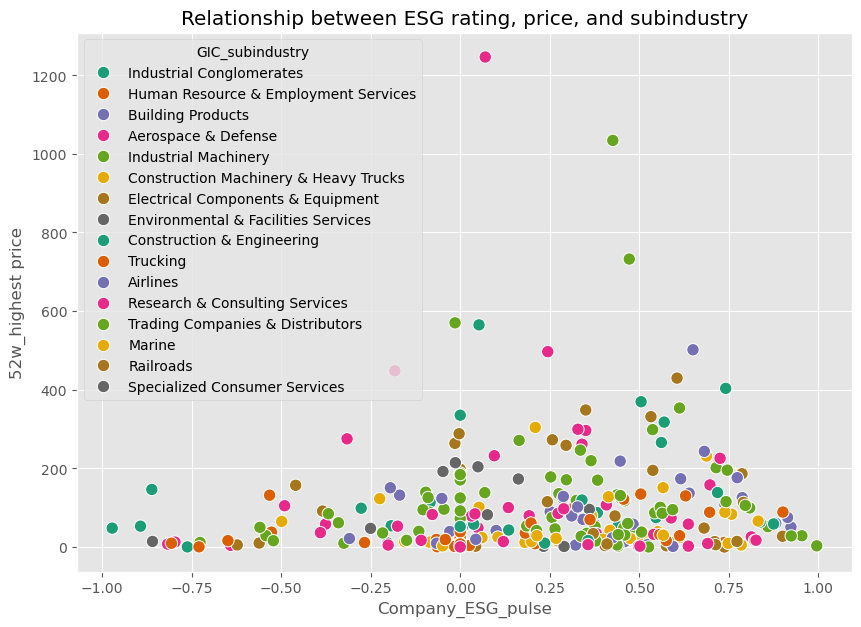

In [73]:
# Now we'll create a scatterplot again, but this time it will include a smaller number of subindustries
# Be sure to change the df name in data=
sns.scatterplot(x="Company_ESG_pulse", y="52w_highest price", hue="GIC_subindustry", data=df_scatter, palette="Dark2", s=80)
plt.title("Relationship between ESG rating, price, and subindustry")

plt.savefig('scatterplot-ESG-industrials.png',bbox_inches='tight')
plt.show()



### Scatterplot with regression line

<Axes: xlabel='Company_ESG_pulse', ylabel='52w_highest price'>

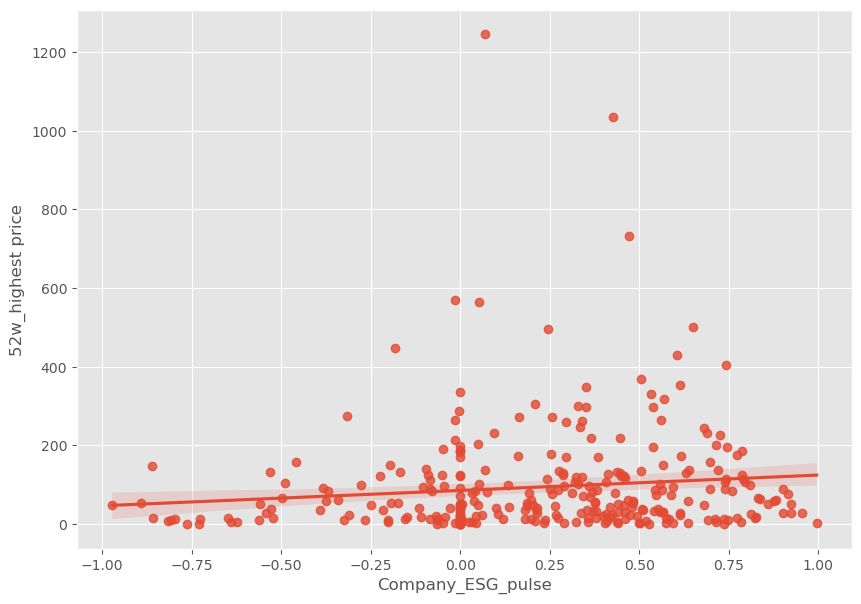

In [58]:
# Show a linear regression line using seaborn.regplot
# See https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(data=df_scatter, x="Company_ESG_pulse", y="52w_highest price")

### Heatmap

In [59]:
# Heatmaps are based on numerical values so will remove columns that are text/ strings and create a new df
df_numericals = df1[['Company_ESG_pulse', 'Volume', 'Market Cap', '52w_highest price',
                    '52w_lowest price', '52w_change price','52w_average volume', ]]
df_numericals

Company_ESG_pulse     Volume    Market Cap  52w_highest price  \
0            -0.083992  2024694.0  5.096457e+10             113.20   
1             0.776978        NaN           NaN                NaN   
2             0.251170   552008.0  1.256457e+10              89.96   
3             0.739143        NaN           NaN             107.09   
4             0.588800   174582.0  2.186558e+09              73.95   
..                 ...        ...           ...                ...   
701           0.000000        NaN           NaN                NaN   
702          -0.226300        NaN           NaN                NaN   
703          -0.083678        NaN           NaN                NaN   
704           0.432050   779541.0  1.235708e+10              79.04   
705           0.000000        NaN           NaN               0.26   

     52w_lowest price  52w_change price  52w_average volume  
0               85.34           -11.290           1648276.0  
1                 NaN               NaN                 NaN  
2               63.88            19.470            452457.0  
3               52.24           -10.145            157665.0  
4               50.06             6.670             74456.0  
..                ...               ...                 ...  
701               NaN               NaN                 NaN  
702               NaN               NaN                 NaN  
703               NaN               NaN                 NaN  
704             40.19            31.890            561554.0  
705              0.00            -0.020               550.0  

[706 rows x 7 columns]

In [60]:
# Drop rows that have any Nan values
df_numericals2 = df_numericals.dropna()

In [61]:
df_numericals2.reset_index(drop=True)

Company_ESG_pulse     Volume    Market Cap  52w_highest price  \
0            -0.083992  2024694.0  5.096457e+10             113.20   
1             0.251170   552008.0  1.256457e+10              89.96   
2             0.588800   174582.0  2.186558e+09              73.95   
3             0.482884   149678.0  2.705078e+09              53.05   
4             0.600923   346766.0  4.732177e+08               6.62   
..                 ...        ...           ...                ...   
219           0.138961   361594.0  1.456520e+10             130.51   
220           0.447070   525813.0  3.093936e+10             130.86   
221           0.267866  2174222.0  1.255191e+09              22.00   
222          -0.120556  1639114.0  1.662739e+10              30.05   
223           0.432050   779541.0  1.235708e+10              79.04   

     52w_lowest price  52w_change price  52w_average volume  
0               85.34           -11.290           1648276.0  
1               63.88            19.470            452457.0  
2               50.06             6.670             74456.0  
3               37.61            -0.685            206996.0  
4                4.30             0.045            263285.0  
..                ...               ...                 ...  
219             31.73            93.455            910834.0  
220             87.59            23.980            835858.0  
221              6.39            -9.320           1442998.0  
222             15.90            -8.035           1311450.0  
223             40.19            31.890            561554.0  

[224 rows x 7 columns]

In [62]:
df_numericals2.dtypes

Company_ESG_pulse     float64
Volume                float64
Market Cap            float64
52w_highest price     float64
52w_lowest price      float64
52w_change price      float64
52w_average volume    float64
dtype: object

Text(0.5, 1.0, 'GIC subindustry attributes')

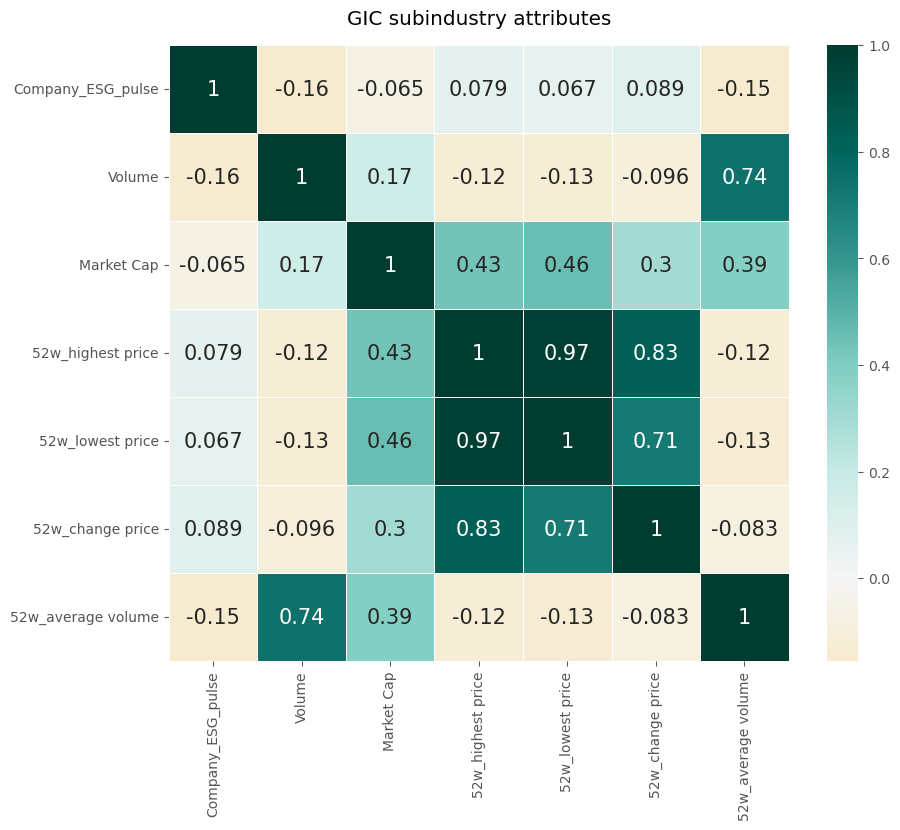

In [63]:
# see https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410
fig, ax = plt.subplots(figsize=(10,8))

# columns shown are "selected" by corr() since they are the most ideal for the plot
heatmap = sns.heatmap(df_numericals2.corr(), center=0, cmap='BrBG', annot=True, 
            annot_kws={'size': 15}, 
            linewidth=.5)

ax.set_title("GIC subindustry attributes", pad = 15)

# alternatively, use cmap = "Spectral_r"
#plt.show()

# Darker colors = stronger correlations

# to save the figure as an image file
#plt.savefig('industrials-heatmap.png', dpi=300, bbox_inches='tight')

In [64]:
# was only getting annotations (labels) in first row of the heatmap so upgraded seaborn (using pip install seaborn --upgrade)
# Then the annotations showed up in all cells

In [65]:
#pip install seaborn --upgrade